In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
# import ujson
import synapseclient
from synapseclient import Project, Folder, File, Link
from datetime import datetime
from datetime import timedelta
import time
import glob2
import random
import os

In [2]:
from synapseclient import Activity
from synapseclient import Entity, Project, Folder, File, Link
from synapseclient import Evaluation, Submission, SubmissionStatus
from synapseclient import Wiki
from synapseclient import Schema, Column, Table, Row, RowSet, as_table_columns

# pulling pedometer files from personal computer (6mwt subset)

In [265]:
#pulling files from 6mwt subset on personal computer (not validation set)
walk_data = glob2.glob('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt_subset/*/')

In [266]:
def count_em(valid_path):
    x = 0
    for root, dirs, files in os.walk(valid_path):
        for f in files:
            x = x+1
    return files,x

file_size = []
max_file = []
big_files = []
ped_files2 =[]
ped_files1 = []
empty_files = []

for i in range(len(walk_data)):
    files, x = count_em(walk_data[i])
    if x > 1:
        for f in files:
            filename = walk_data[i]+f
#             print filename
            file_size.append(os.path.getsize(filename))
        max_file.append([(max(file_size)),filename])    

    elif x <1:
        empty_files.append(walk_data[i])
    elif x ==1:
        ped_files1.append((walk_data[i]+files[0]))

#append filenames to list for biggest files in each folder   
big_files = pd.DataFrame(max_file)
for i in range(len(big_files)):
    ped_files2.append(big_files[1][i])

#create a list of filenames for pedfiles2 + pedfiles
ped_files = ped_files2 + ped_files1

In [ ]:
len(data_fix)

In [ ]:
empty_files

In [270]:
#read in json file and append health code as a column so can match to future synapse tables.
ped_df = []

for i in range(len(ped_files)):
    ped_df.append(pd.read_json(ped_files[i]))
    ped_df[i]['healthCode'] = ped_files[i][58:-89]


In [273]:
ped_df[1]

,distance,endDate,floorsAscended,floorsDescended,numberOfSteps,startDate,healthCode
0,4.275360,2015-03-18T20:32:55-0400,0,0,5,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
1,9.210965,2015-03-18T20:32:57-0400,0,0,11,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
2,12.020201,2015-03-18T20:33:00-0400,0,0,15,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
3,17.626876,2015-03-18T20:33:02-0400,0,0,22,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
4,21.046012,2015-03-18T20:33:05-0400,0,0,27,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
5,26.879984,2015-03-18T20:33:07-0400,0,0,34,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
6,31.101226,2015-03-18T20:33:10-0400,0,0,39,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
7,36.231658,2015-03-18T20:33:12-0400,0,0,45,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
8,41.427032,2015-03-18T20:33:15-0400,0,0,51,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6
9,46.427579,2015-03-18T20:33:17-0400,0,0,57,2015-03-18T20:32:53-0400,c092ea93-6a08-4323-8d1b-a05c4dfe9ad6


In [ ]:
# extract pedometer_fitness.walk.items json files from this table

pedo_data = []
json_peds =[]

for i in range(len(df_pedo[1:5])):
    json_peds.append(syn.downloadTableFile(ped_results, column='pedometer_fitness.walk.items', rowId=i, versionNumber=1, ifcollision=u'keep.both'))
    for i in range(len(json_peds)):
        pedo_data.append(pd.read_json(json_peds[i]))
        pedo_data[i]['healthCode'] = df_pedo['healthCode'][i]
        pedo_data[i]['phoneInfo'] = df_pedo['phoneInfo'][i]

In [ ]:
len(pedo_data)

# Pulling pedometer files from synapse

In [5]:
syn = synapseclient.login()
syn.login()

Welcome, nmoyen@stanford.edu!

Welcome, nmoyen@stanford.edu!



In [6]:
def get_table(syn_id):
    table_id = syn_id
#     synapse_login(syn)
    table_results = syn.tableQuery("SELECT * FROM %s" % table_id, resultsAs="rowset")
    df_table = table_results.asDataFrame()
    return table_results, df_table

In [ ]:
#pulling files from synapse instead (to get larger sample size)
ped_id = 'syn11073669' #this is the 6-Minute Walk Test_SchemaV4-v2 table- 803 people (340 non-duplicates)

#query synapse table online and bring into python

ped_results = syn.tableQuery("SELECT * FROM %s" % ped_id, resultsAs="rowset")
ped_results
df_pedo = ped_results.asDataFrame()
# len(df_pedo)

In [ ]:
#get json files extracted from df_pedo table ()
pedo_data1 = []
json_peds1 =[]

for i in range(len(df_pedo)):
    try:
        json_peds1.append(syn.downloadTableFile(ped_results, column='pedometer_fitness.walk.items', rowId=i, versionNumber=1, ifcollision=u'keep.both'))
    except 'NoneType':
        continue
        
for i in range(len(json_peds1)):
    pedo_data1.append(pd.read_json(json_peds1[i]))
    pedo_data1[i]['healthCode'] = ped_df2['healthCode'][i]
    pedo_data1[i]['phoneInfo'] = ped_df2['phoneInfo'][i]

In [ ]:
ped_results

In [ ]:
syn.onweb('syn3458480')

In [ ]:
#importing cardiovascular-6MinuteWalkTest-v2 table

table_results, df_table = get_table('syn3458480')
ped_df2 = df_table
table_ped2 = table_results
len(ped_df2)

In [ ]:
# (ped_df2['pedometer_fitness.walk.items'].isnull()==True)


In [ ]:
#remove rows with no pedometer file-- 14478_150     True

ped_df2 = ped_df2[ped_df2['pedometer_fitness.walk.items'].isnull()==False]
# ped_df2['pedometer_fitness.walk.items']

In [ ]:
#getting all pedometer json files from ped_df2 table (14,479 entries)- but some are duplicates and some will be missing
#pedometer files

# pedo_data2 = []
# json_peds2 =[]

# for i in range(len(ped_df2[200:300])):
#     try:
#         json_peds2.append(syn.downloadTableFile(table_ped2, column='pedometer_fitness.walk.items', rowId=i, versionNumber=1, ifcollision=u'keep.both'))
#     except 'TypeError' or 'ValueError':
#         continue


In [ ]:
len(json_peds2)

In [ ]:
pedo_data2 = []

for i in range(len(json_peds2)):
    try:
        pedo_data2.append(pd.read_json(json_peds2[i]))
        pedo_data2[i]['healthCode'] = ped_df2['healthCode'][i]
        pedo_data2[i]['phoneInfo'] = ped_df2['phoneInfo'][i]
    except 'ValueError':
        continue

In [ ]:
pedo_data2[1]

In [ ]:
#importing  cardiovascular-6-Minute Walk Test_SchemaV4-v1 table

table_results, df_table = get_table('syn4857044')
table_ped2 = table_results
ped_df3 = df_table
len(ped_df3)

In [ ]:
#remove rows with missing pedometer walk data (json files)

ped_df3 = ped_df3[ped_df3['pedometer_fitness.walk.items'].isnull()==False]
len(ped_df3)

In [ ]:
#get json files extracted from ped_df3 table ()
import time

pedo_data3 = []
json_peds3 =[]

for i in range(len(ped_df3[:100])):
    try:
        json_peds3.append(syn.downloadTableFile(ped_df3, column='pedometer_fitness.walk.items', rowId=i, versionNumber=1, ifcollision=u'keep.both'))
    except 'NoneType':
        continue
    time.sleep(60)
        
for i in range(len(json_peds3)):
    pedo_data3.append(pd.read_json(json_peds3[i]))
    pedo_data3[i]['healthCode'] = ped_df2['healthCode'][i]
    pedo_data3[i]['phoneInfo'] = ped_df2['phoneInfo'][i]

In [ ]:
ped_comb = []
for i in range(len(pedo_data2)):
    ped_comb.append(pedo_data2[i])
for i in range(len(ped_df)):
    ped_comb.append(ped_df[i])

In [ ]:
len(ped_comb)

In [ ]:
ped_df = ped_comb

# analyzing pedometer files for gait speed metrics

In [ ]:
#running through files and adding columns of delta time (end time - start time) and gait speed (distance/delta- m/s)

for i in range(len(ped_df)):
    start = []
    end = []
    delta = []
    distance = []
    gait_speed = []
    for index,row in ped_df[i].iterrows():
        start.append(datetime.strptime((str(row.startDate[:-5])).replace('T',' '), "%Y-%m-%d %H:%M:%S"))
        end.append(datetime.strptime((str(row.endDate[:-5].replace('T',' '))),"%Y-%m-%d %H:%M:%S"))
        delta.append(float((end[index] - start[index]).seconds))
        distance.append(float(row.distance))
        try:
            gait_speed.append(distance[index]/delta[index]) #distance/delat for m/s ped
            ped_df[i].loc[index,'delta'] = delta[index]
            ped_df[i].loc[index,'gait_speed']=gait_speed[index]
        except ZeroDivisionError:
            gait_speed.append(float('nan'))
            ped_df[i].loc[index,'delta'] = delta[index]
            ped_df[i].loc[index,'gait_speed']=gait_speed[index]
#             print 'This file has Nans'
            continue

In [ ]:
#remove rows that have nans for gait speed 
data = []
for i in range(len(ped_df)):
    data.append(ped_df[i][(ped_df[i]['gait_speed'].isnull() == False)])


In [ ]:
#remove rows that have gait speed >3.0 m/s - this is not really physically possible 
#and likely b/c time sample (i.e. delta) was too short
data_fix = []
for i in range(len(data)):
    data_fix.append(data[i][data[i]['gait_speed'] <3.0])  


In [ ]:
#function that creates plots of delta time vs. gait speed for each subject; 
#need to remove NaN's from gait speed for plotting
#will save figures to folder as .png file in path folder
path = '/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/GaitSpeedPlots/'

for i in range(len(data_fix)):
    ind = list(data_fix[i].index)
    ind_rand = random.choice(ind)
    x = data_fix[i]['distance']
    y = data_fix[i]['gait_speed']
    line = round(np.mean(data_fix[i]['gait_speed']),2)
    med = round(np.median(data_fix[i]['gait_speed']),2)
    plt.plot(x,y,'o')
    print line, data_fix[i]['healthCode'][ind_rand]
    print med, data_fix[i]['healthCode'][ind_rand]
#     plt.axhline(line,'--',color = 'blue', label= 'mean gait speed')
#     plt.axhline(med, '-', color = 'red', label = 'median gait speed')
    plt.legend()
    plt.annotate(('Mean GS = '+ str(line)), [250,min(y)+.2])
    plt.annotate(('Median GS = '+ str(med)), [250,min(y)+0.3])
    plt.title(str(data_fix[i]['healthCode'][ind_rand]))
    plt.xlabel('distance (m)')
#     plt.xlim(0,360)
    plt.ylabel('gait speed (m/s)')
    plt.show()
#     plt.savefig(path+(data_fix[i]['healthCode'][ind_rand])+'.png',dpi=300)
    plt.close()

In [ ]:
#finding out how quickly subjects completed 100 m (time) because this appears to be where curve is greatest (= delta_100) 
#also get gait speed at 100 m (gs_100) & total distance covered during 6mwt (=total_dist)

delta_100 = []
gs_100 = []
total_dist = []


for i in range(len(data_fix)):
    ind = list(data_fix[i].index)
    ind_rand = random.choice(ind)
    total_dist.append(float(data_fix[i]['distance'][-1:]))
    
    for index,row in data_fix[i].iterrows():
        find_100 = np.isclose(row.distance,100,atol=3)
        if find_100 == True:
            delta_100.append(row.delta)
            gs_100.append(row.gait_speed)
        else:
            continue

    
print gs_100
print delta_100
print total_dist

In [ ]:
#creating a df with just median gait-speed and healthcode to combine with CV risk factors for further analyses
med_gs = [] #median gait speed
gait_df = []
gait_dict = []
min_max = [] #subtracting min from max gait speed to see change in gait speed throughout course of test
min_gs = [] #minimum gait speed
max_gs = [] #max gait speed
min_med = [] #calculating the min speed from median
max_med = [] #calculating the max speed from median
healthCode = []

for i in range(len(data_fix)):
    ind = list(data_fix[i].index)
    ind_rand = random.choice(ind)
    med_gs.append(round(np.median(data_fix[i]['gait_speed']),2))
    min_gs.append(min(data_fix[i]['gait_speed']))
    max_gs.append(max(data_fix[i]['gait_speed']))
    min_max.append(max_gs[i] - min_gs[i])
    min_med.append(med_gs[i] - min_gs[i])
    max_med.append(max_gs[i] - med_gs[i])
    healthCode.append(data_fix[i]['healthCode'][ind_rand])
   
    #create a df with this variables by each subject
    gait_dict={'median_gait_speed':med_gs[i],               
                 'healthCode': healthCode[i],
                'max_min_diff': min_max[i],
                'min_gait_speed': min_gs[i],
                'max_gait_speed': max_gs[i],
                'min_med': min_med[i],
                'max_med': max_med[i],
                'min_max': min_max[i],
                'gs_100': gs_100[i],
                'delta_100': delta_100[i],
                'total_dist': total_dist[i]}
    gait_df.append(gait_dict)


In [ ]:
#move gait_df from dictionary to dataframe so that I can join with the demographic tables
gait_var = pd.DataFrame.from_dict(gait_df, orient='columns')
len(gait_var)

In [ ]:
for i in range(len(gait_var)):
    if delta_100[i]>300.:
        print healthCode[i], delta_100[i]

In [ ]:
x = gait_var['total_dist']
y= gait_var['median_gait_speed']
plt.plot(x,y,'o')
# plt.ylim(0,100)
plt.show()

In [ ]:
#saving gait speed analyses to csv file so don't need to rerun the analyses
gait_var.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/gaitspeeds.csv')

# Functions to pull data from synapse- getting other tables needed

In [ ]:
#first, need to login to synapse

syn = synapseclient.login()
syn.login()


In [ ]:
#function that pulls table from synapse client and creates a df; input takes synapse ID; **Note: this method will
#not allow you to extract files from columns- will need to keep as an SQL table to do that- see below for code for that.

def get_table(syn_id):
    table_id = syn_id
#     synapse_login(syn)
    table_results = syn.tableQuery("SELECT * FROM %s" % table_id, resultsAs="rowset")
    df_table = table_results.asDataFrame()
    return table_results, df_table


# CV risk table

In [ ]:
#pulling in CV risk table - family history
table_results, df_table = get_table('syn4703171')
CVrisk = df_table
CVrisk.head()

In [ ]:
len(CVrisk)

In [ ]:
#get duplicates and make sure entries are similar in CVrisk table
CV_dup = CVrisk.duplicated(subset='healthCode', keep=False)
CVrisk['duplicates'] = CV_dup

for i in range(len(CVrisk)):
    if CVrisk['duplicates'][i] ==True:
        print (CVrisk['healthCode'][i],CVrisk['vascular'][i])

In [ ]:
#drop duplicates
CV_table = CVrisk.drop_duplicates(subset='healthCode',keep='first')

In [ ]:
CV_table.head()

In [ ]:
#creating dummy variables for  vascular disease: 1 means indicated vascular disease- 
vas_CV = pd.DataFrame(CV_table['vascular'])
new_vas_CV = []

for index,row in vas_CV.iterrows():
    if row.vascular == '[7]':
        new_vas_CV.append(0)
    elif pd.isnull(row.vascular):
        new_vas_CV.append('NaN')
    elif row.vascular == '[]':
        new_vas_CV.append('NaN')
    else:
        new_vas_CV.append(1)
CV_table['vas_dummy'] = new_vas_CV

In [ ]:
#496 people indicated vascular disease; 8312 indicated no vascular disease; 52 people didn't answer question
len(CV_table[CV_table['vas_dummy']==0])

In [ ]:
#creating dummy variables for CV disease: 1 means indicated vascular disease- 
#creating a new family history dummy column, where any row with a 3 gets a 0  and anything else gets a 1
fam = pd.DataFrame(CV_table['family_history'])
new_fam = []

for index,row in fam.iterrows():
    if row.family_history == '[3]':
        new_fam.append(0)
    elif pd.isnull(row.family_history):
        new_fam.append('NaN')
    elif row.family_history == '[]':
        new_fam.append('NaN')
    else:
        new_fam.append(1)
CV_table['famhist_dummy'] = new_fam

#creating a new heart_disease  dummy column, where any row with a 10 gets a 0  and anything else gets a 1
CV_dis = pd.DataFrame(CV_table['heart_disease'])
CVdis_dummy = []

for index,row in CV_dis.iterrows():
    if row.heart_disease == '[10]':
        CVdis_dummy.append(0)
    elif pd.isnull(row.heart_disease):
        CVdis_dummy.append('NaN')
    elif row.heart_disease == '[]':
        CVdis_dummy.append('NaN')
    else:
        CVdis_dummy.append(1)
CV_table['CVdis_dummy'] = CVdis_dummy

#creating a new medications to treat  dummy column, where any row with a 4 gets a 0  and anything else gets a 1
meds = pd.DataFrame(CV_table['medications_to_treat'])
meds_dummy = []

for index,row in meds.iterrows():
    if row.medications_to_treat == '[4]':
        meds_dummy.append(0)
    elif pd.isnull(row.medications_to_treat):
        meds_dummy.append('NaN')
    elif row.medications_to_treat == '[]':
        meds_dummy.append('NaN')
    else:
        meds_dummy.append(1)
CV_table['meds_dummy'] = meds_dummy

In [ ]:
#7796 people do not have CV disease; 1018 people indicated some type of CV disease; 46 people did not answer
len(CV_table[CV_table['CVdis_dummy']==0])

In [ ]:
#6469 people are not on meds; 2373 people indicated they are on meds; 18 people did not answer the question
len(CV_table[CV_table['meds_dummy']==0])

In [ ]:
#6913 people have no family history of early heart disease; 1884 indicated fam hist for heart disease; 63 people did not answer the question
len(CV_table[CV_table['famhist_dummy']=='NaN'])

In [ ]:
#create CV_table to csv so don't have to download data again
CV_table.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/CV_Q.csv')

# ParQ table

In [274]:
#pulling in parQ table
table_results, df_table = get_table('syn3420257')
ParQ = df_table
ParQ.head()
#demographics w/CV risk = 8208
#demographics w/parq = 19429
#len(cv_risk.intersection(parq))- 7973

,recordId,appVersion,phoneInfo,uploadDate,healthCode,externalId,dataGroups,createdOn,createdOnTimeZone,userSharingScope,validationErrors,chestPain,chestPainInLastMonth,dizziness,heartCondition,jointProblem,physicallyCapable,prescriptionDrugs
0_0,90bbe279-1485-4ccb-b7f4-f78e822512ec,"version 1.0, build 5.1",iPhone 6 Plus,2015-03-09,ceb60f6c-d7c1-4fe0-a2bd-01e6de0cae19,None,None,2015-03-10 04:22:20,None,None,None,False,False,False,False,False,True,False
1_0,871bf617-64b4-4daa-9ff3-64c183c6888d,"version 1.0, build 5.1",iPhone 5s (GSM+CDMA),2015-03-09,4c8ae705-217c-45a7-a188-1810a0ebb59c,None,None,2015-03-10 04:24:24,None,None,None,False,False,False,False,False,False,False
2_0,ed2ceaa2-9122-41c4-b570-8a339f7dbdce,"version 1.0, build 5.1",iPhone 6 Plus,2015-03-09,98609d3d-fe46-4e15-a39b-09840a9943a7,None,None,2015-03-09 23:43:40,None,None,None,False,False,False,False,False,False,True
3_0,670ddabb-e49c-48c6-8615-bcd930873490,"version 1.0, build 5.1",iPhone 6,2015-03-09,234acdb6-c223-4b68-a189-46ed5d5d01e3,None,None,2015-03-10 00:20:33,None,None,None,False,False,False,False,False,False,False
4_0,96f02a50-4a4d-49bd-920a-8d3ddb68998a,"version 1.0, build 5.1",iPhone 6,2015-03-09,a5a06622-7142-487e-8682-863b75d5e26c,None,None,2015-03-09 19:47:24,None,None,None,True,False,False,False,True,False,False


In [ ]:
len(ParQ)

In [275]:
ParQ = ParQ.drop_duplicates(subset='healthCode',keep='first')
len(ParQ)

42397

In [ ]:
ParQ.keys()

In [ ]:
#create dummy variable for chest pain
df_chestPain = pd.get_dummies(ParQ['chestPain'],prefix='chestPain')
df_use2 = pd.concat([ParQ,df_chestPain],axis=1)
del df_use2['chestPain_False']

In [ ]:
#create dummy variable for chest pain in last month
df_chestPainLstMo = pd.get_dummies(ParQ['chestPainInLastMonth'],prefix='chPnLstMo')
df_use3 = pd.concat([df_use2,df_chestPainLstMo],axis=1)
del df_use3['chPnLstMo_False']
# df_use4.head()

In [ ]:
#create dummy variable for physically capable 
df_physCap = pd.get_dummies(ParQ['physicallyCapable'],prefix='physCap')
df_use4 = pd.concat([df_use3,df_physCap],axis=1)
del df_use4['physCap_False']
# df_use4.head()

In [ ]:
#create dummy variable for physically capable 
df_hrtCond = pd.get_dummies(ParQ['heartCondition'],prefix='hrtCond')
df_use5 = pd.concat([df_use4,df_hrtCond],axis=1)
del df_use5['hrtCond_False']
# df_use6.head()

In [ ]:
#create dummy variable for Rx drugs  
df_RxDrugs= pd.get_dummies(ParQ['prescriptionDrugs'],prefix='RxDrugs')
df_use6 = pd.concat([df_use5,df_RxDrugs],axis=1)
del df_use6['RxDrugs_False']
# df_use7.head()

In [ ]:
#create dummy variable for dizziness
df_dizzy= pd.get_dummies(ParQ['dizziness'],prefix='dizzy')
df_use7 = pd.concat([df_use6,df_dizzy],axis=1)
del df_use7['dizzy_False']
# df_use8.head()

In [ ]:
#create dummy variable for joint problems
df_joints= pd.get_dummies(ParQ['jointProblem'],prefix='joints')
df_use8 = pd.concat([df_use7,df_joints],axis=1)
del df_use8['joints_False']
# df_use9.head()

In [ ]:
#sending ParQ data to csv file so don't have to download it again
df_use8.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/ParQ.csv')

# Height table

In [277]:
#pull in demographic table- specifically height

table_results, df_table = get_table('syn3917840')
height = df_table


KeyboardInterrupt: 

In [ ]:
#create a height column in meters instead of inches
height['height']=height['NonIdentifiableDemographics.json.patientHeightInches'] * 0.0254
height.head()

In [276]:
#dropping duplicates from height data based on healthCode entered twice
height = height.drop_duplicates(subset='healthCode', keep='first')
len(height)

NameError: name 'height' is not defined

In [ ]:
#saving height data to csv so don't need to download data again
height.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/height.csv')

In [282]:
height = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/height.csv')
len(height)

20121

# Importing demographic table and creating dummy var for sex

In [278]:
#import tsv table with age, gender, and healthCode

import csv
demo_df = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/demo_table.csv')
len(demo_df)

24578

In [279]:
#drop duplicates of demographic table
demo_new = demo_df.drop_duplicates(subset='healthCode', keep = 'first')
len(demo_new)

23787

In [ ]:
demo_new.keys()

In [ ]:
#dummy variable for sex where male = 1 and female =0
df_sex= pd.get_dummies(demo_df['Sex'],prefix='Sex')
demo_use = pd.concat([df_sex,demo_new],axis=1)

del demo_use['Sex_Female']
del demo_use['Sex_Other']

demo_use.head()

In [ ]:
#saving new demographic as csv
demo_use.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/demographic.csv')

# Joining all tables to one big table and saving as different csv files

In [ ]:
#pulling in individual csv files from "Final_csvs" folder
path = '/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/'

CV_df = pd.read_csv(path+'CV_Q.csv')
ParQ_df = pd.read_csv(path+'ParQ.csv')
demo_df = pd.read_csv(path+'demographic.csv')
ht_df = pd.read_csv(path+'height.csv')
gait = pd.read_csv(path+'gaitspeeds.csv')

In [ ]:
print 'CV', len(CV_df)
print 'ParQ', len(ParQ_df)
print 'demographics', len(demo_df)
print 'height', len(ht_df)
print 'gaits', len(gait)

In [ ]:
#join CV risk and ParQ data frames by health Code
risk_df = ParQ_df.merge(CV_df,left_on = 'healthCode',right_on='healthCode',how='outer')
# risk_df.head()

In [ ]:
len(risk_df)

In [ ]:
risk_df.head()

In [ ]:
#join the risk_df and demo_df tables-- getting an error for now- need to fix tsv table

charc_df = risk_df.merge(demo_df,left_on='healthCode',right_on='healthCode', how='outer')
len(charc_df)

In [ ]:
#merge height table with others
anthrop_df = charc_df.merge(height,left_on='healthCode',right_on='healthCode', how='outer')
len(anthrop_df)

In [ ]:
#save anthropometric data to one csv so have all anthropometric data merged
anthrop_df.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/anthropometric_final.csv')

In [ ]:
#read in anthropometric csv (because I deleted a bunch of unecessary columns)
anthro = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/anthropometric_final.csv')

In [ ]:
#join anthropometric df with gait speed df
overall_df = anthro.merge(gait,left_on='healthCode',right_on='healthCode', how='inner')
len(overall_df)
del overall_df['Unnamed: 0_x']
del overall_df['Unnamed: 0_y']

In [ ]:
overall_df.keys()

In [ ]:
overall_df.head()

In [ ]:
#send overall_df to csv
overall_df.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/overall_gs.csv')

In [ ]:
overall_df.keys()

In [ ]:
len(overall_df[overall_df['famhist_dummy']== 1])

In [ ]:
x = overall_df['famhist_dummy']
y = overall_df['median_gait_speed']
# plt.xlim(0,200)
plt.plot(y,x,'o')
plt.show()

# clean overall dataframe to bring into R for data analyses 

In [ ]:
# all_df.keys()

In [ ]:
#delete columns from df we don't care about
del_col = ['dataGroups','createdOnTimeZone','appVersionCVrisk','appVersionCVrisk','uploadDateCVrisk','uploadDate',
           'dataGroupsCVrisk','createdOnCVrisk','createdOnTimeZoneCVrisk','Version','appVersion','externalId','createdOn','userSharingScope',
          'recordIdCVrisk','phoneInfoCVrisk','userSharingScopeCVrisk','externalIdCVrisk','NonIdentifiableDemographics.patientWeightPounds',
          'recordIdheight','appVersionheight','uploadDateheight','externalIdheight','dataGroupsheight','createdOnheight',
          'createdOnTimeZoneheight','userSharingScopeheight','validationErrorsheight','NonIdentifiableDemographics.patientWeightPounds',
          'NonIdentifiableDemographics.patientBiologicalSex','NonIdentifiableDemographics.patientHeightInches','NonIdentifiableDemographics.json.patientWakeUpTime',
          'NonIdentifiableDemographics.patientWakeUpTime','NonIdentifiableDemographics.patientCurrentAge','NonIdentifiableDemographics.json.patientGoSleepTime',
          'NonIdentifiableDemographics.patientGoSleepTime','recordId','validationErrors','NonIdentifiableDemographics.json.patientHeightInches',
          'ethnicity', 'race', 'education','Ancestry','phoneInfoheight']
all_df.drop(del_col,axis=1,inplace=True)

In [ ]:
#create csv with data to open and work with in R

overall_df.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Overall_df.csv')
    

In [ ]:
height_true = (df_use10[df_use10['height'].isnull() == False])
# height_true['height']

In [ ]:
df_use11 = df_use10[df_use10['median_gait_speed'].isnull() == False]
len(df_use11)

In [ ]:
plt.boxplot(overall_df['median_gait_speed'])
plt.title('total distance in 6MWT')
plt.show()

In [ ]:
#send to csv to upload into R
df_use9.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/cleaned_6mwt.csv')

# running data analyses

In [ ]:
final_df = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/cleaned_6mwt.csv')
final_df.keys()

In [ ]:
min_dist = final_df[final_df['total_dist']<300.]
min_dist['total_dist']

In [ ]:
len(total_dist['total_dist'])

In [ ]:
np.median(total_dist['total_dist'])

In [ ]:
np.std(total_dist['total_dist'])

In [ ]:
total_dist = final_df[final_df['total_dist']>100.]
total_dist['total_dist'] <300.

In [ ]:
# %matplotlib.inline == False
plt.boxplot(total_dist['total_dist'])
plt.title('total distance in 6MWT')
plt.savefig('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/TotalDist.png',dpi=300)

In [ ]:
np.min(total_dist['total_dist'])

In [ ]:
#trying to see if those with total distance<300 m had increased risk of CV disease, med use, etc.. doesn't appear to be anything.
for i in range(len(final_df)):
    if final_df['total_dist'][i] <300.:
        print {'CVdis"': final_df['CVdis_dummy'][i],
               'gait speed': round(final_df['max_gait_speed'][i],2),
               'total_dist': final_df['total_dist'][i],
               'dizzy': final_df['dizziness'][i],
               'weight': final_df['NonIdentifiableDemographics.json.patientWeightPounds'][i], 
               'Age': final_df['Age'][i],
               'RXdrugs': final_df['RxDrugs_True'][i],
               'Prescription': final_df['prescriptionDrugs'][i], 
               'Meds': final_df['medications_to_treat'][i],
              'joint probs': final_df['jointProblem'][i]}
        
        
#         print len(total_dist[i])
    

# ######### Other analyses############

# Query gps table

In [ ]:
#to go to table online - good way to confirm you're querying correct table
syn.onweb('syn4216032')

In [2]:
syn.login()

NameError: name 'syn' is not defined

In [ ]:
synapseclient.table?

In [ ]:
#query synapse table online and bring into python

gps_id = 'syn4216032'

gps_results = syn.tableQuery("SELECT * FROM %s" % gps_id, resultsAs="rowset")
gps_results

In [ ]:
#creates a pandas df of the synapse table- only problem is that you can't extract files from this table
gps_results
df_gps = gps_results.asDataFrame()
df_gps

In [ ]:
gps_results
df_gps = gps_results.asDataFrame()
len(df_gps['UnknownFile_1.json.items'])

In [ ]:
gps_id = 'syn4216032'

gps_data = []
json_gps =[]
gps_results = syn.tableQuery("SELECT * FROM %s" % gps_id, resultsAs="rowset")
gps_results

for i in range(len(df_gps)):
    json_gps.append(syn.downloadTableFile(gps_results, column='UnknownFile_1.json.items', rowId=i, versionNumber=1, ifcollision=u'keep.both'))
    for i in range(len(json_gps)):
        gps_data.append(pd.read_json(json_gps[i]))
        gps_data[i]['healthCode'] = df_gps['healthCode'][i]
        gps_data[i]['version'] = df_gps['appVersion'][i]


In [ ]:
for i in range(len(df_gps)):
    print df_gps['appVersion'][i]
    gps_data[i]['version'] = df_gps['appVersion'][i]
    gps_data[i]['healthCode'] = df_gps['healthCode'][i]


In [ ]:
len(gps_data)

In [ ]:
#filter for v.2.02 or higher and filter for auto-lock datasets
disp= []
gps_data2 = []
gps_problems = []

for i in range(len(gps_data)):
    disp.append(sum(gps_data[i]['displacement']))
    if disp[i]>=350:
        gps_data2.append(gps_data[i])
    else:
        gps_problems.append(gps_data[i])
   
        

In [ ]:
print 'total data', len(gps_data)
print 'OK data', len(gps_data2)
print 'problem data', len(gps_problems)

In [ ]:
# OK_v2 = []
# prob_v2 = []

# for i in range(len(gps_data2)):
#     if gps_data2[i]['version'][i].startswith('version 2.0') == True:
#         print gps_data2[i]['healthCode'][i]
# #         try:
# #             OK_v2.append(gps_data2[i]['healthCode'][i])
# #         except KeyError:
# #             continue
#     else:
#         pass
# #     elif gps_problems[i]['version'][i].startswith('version 2.0'):
#         prob_v2.append(gps_problems[i]['healthCode'][i])
        

In [ ]:
gps_problems[1]

In [ ]:
#from steve's notebook
df = pd.read_json(in_fn)
df["dx"] = df.displacement * np.cos(df.direction)
df["dy"] = df.displacement * np.sin(df.direction)
# sum displacements to coordinates
df["x"] = df.dx.cumsum()
df["y"] = df.dy.cumsum()

In [ ]:
for i in range(len(gps_data2)):
    y = gps_data2[i]['displacement']
    x = gps_data2[i]['timestamp']
    plt.xlabel('Timestamp')
    plt.ylabel('Displacement')
#     plt.annotate(str(gps_data['appVersion'][i]), [max(x),max(y)])
    plt.plot(x,y,'o')
    plt.show()
    plt.close()
    print sum(gps_data2[i]['displacement'])
    print (gps_data2[i]['version'][i])

# previous data analyses

In [ ]:
#pulling in all 6 min walk json pedometer files
accel_data=glob.glob('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/accel*.json')
ped_df = glob.glob('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/pedometer*.json')
disp_data = glob.glob('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Disp*.json')
print accel_data

type(accel_data)


In [ ]:
'''other files on desktop'''
#creating a data frame for pedometer data and accel data separately
data_accel = []
data_ped = []
data_disp = []
for i in range(len(accel_data)):
#     print allfiles[i]
    data_accel.append(pd.read_json(accel_data[i]))
#     data_df.append(pd.DataFrame(data))
    
for i in range(len(ped_df)):
#     print ped_d[i]
    data_ped.append(pd.read_json(ped_df[i]))
#     data_df.append(pd.DataFrame(data))

for i in range(len(disp_data)):
#     print ped_d[i]
    data_disp.append(pd.read_json(disp_data[i]))
    

len(data_disp)

In [ ]:
data_disp

In [ ]:
for i in range(len(data_disp)):
    y = data_disp[i]['displacement']
    x = data_disp[i]['timestamp']
    plt.plot(x,y)
    plt.show()

In [ ]:
import peakutils
from peakutils.plot import plot as pplot

In [ ]:
%matplotlib inline
for i in range(len(data_accel)):
    x = data_accel[i]['x']
    y = data_accel[i]['y']
    z = data_accel[i]['z']
    dist = data_accel[i]['timestamp']
#     plt.hold(True)
    plt.plot(dist,x,'o',color='blue')
    plt.plot(dist,y,'o',color='green')
    plt.plot(dist,z,'o',color = 'red')
#     plt.xlim(0, 500)
#     plt.title(str(data.index(data[i])))
    plt.xlabel('x axis')
#     plt.ylabel('# of steps taken')

    indexes = peakutils.indexes(x, thres=0.5)
    print(indexes)
    print(x[indexes], dist[indexes])
    plt.figure(figsize=(10,6))
    pplot(dist, y, indexes)
    plt.title('First estimate')
    
    plt.show()
    plt.close()

In [ ]:
for i in range(len(data_ped)):
    x = data_ped[i]['distance']
    y = data_ped[i]['numberOfSteps']
    plt.plot(x,y,'o')
#     plt.title(str(data.index(data[i])))
    plt.xlabel('Distance (m)')
    plt.ylabel('# of steps taken')
    
    plt.show()
    plt.close()

# Query accel, distance, and HR data

In [ ]:
#query synapse table online and bring into python

accel_id = 'syn10170509'

accel_results = syn.tableQuery("SELECT * FROM %s" % accel_id, resultsAs="rowset")
accel_results

In [ ]:
#get json files from synapse table

pedom_data = []

for i in range(len(accel_results)):
    if df_accel['pedometer_fitness.walk.items']: 
        json_pedom = syn.downloadTableFile(accel_results, column='pedometer_fitness.walk.items', rowId=i, versionNumber=1, ifcollision=u'keep.both')
        pedom_data.append(pd.read_json(json_pedom[i]))
        print pedom_data[i]
    

In [ ]:
len(json_gps)

# Looking at validation data

In [6]:
#pull in validation table from synapse - 6mwt v4_v2 from staging area in synapse
syn.val = 'syn10170509'

table_results, df_table = get_table(syn.val)

In [7]:
#save as another name
val_df = df_table
val_results=table_results
val_df.head()

,recordId,appVersion,phoneInfo,uploadDate,healthCode,externalId,dataGroups,createdOn,createdOnTimeZone,userSharingScope,validationErrors,pedometer_fitness.walk.items,accel_fitness_walk.json.items,deviceMotion_fitness.walk.items,heartRate_fitness.walk.items,accel_fitness_rest.json.items,deviceMotion_fitness.rest.items,heartRate_fitness.rest.items,measurementSystem.measurementSystem,measurementSystem.deviceRegion
0_0,3887d01f-56e3-4645-ace0-b97e4a6a7e64,"version 2.0.2, build 4",iPhone 5s (GSM+CDMA),2017-07-11,324e58ac-3fd6-42cb-8e18-1f1dd70bc6db,None,None,2017-07-10 22:32:46,+0200,ALL_QUALIFIED_RESEARCHERS,None,None,16640406,16640421,16640425,16640429,16640436,16640437,Metric,PL
1_1,19fb615a-33a7-4cf5-a5b4-81512aa03854,"version 2.0.2, build 76",iPhone 6,2017-07-19,324e58ac-3fd6-42cb-8e18-1f1dd70bc6db,None,None,2017-07-18 16:25:27,+0200,ALL_QUALIFIED_RESEARCHERS,None,None,16708064,16708096,None,16708103,16708113,None,Metric,PL
2_1,f7fcfe52-ec36-4a17-b5f2-996e4c6c99fa,"version 2.0.2, build 76","iPod7,1",2017-07-19,f9429b1a-d69d-4205-9ee3-aa3850db62fa,None,None,2017-07-18 03:22:11,-0400,ALL_QUALIFIED_RESEARCHERS,None,16708063,16708068,16708099,16708101,16708108,16708117,16708119,U.S.,US
3_1,3c3bd920-719f-4a71-9c07-b9e55acc8981,"version 2.0.2, build 76","iPod7,1",2017-07-19,f9429b1a-d69d-4205-9ee3-aa3850db62fa,None,None,2017-07-18 15:44:30,-0400,ALL_QUALIFIED_RESEARCHERS,None,16708060,16708073,16708100,16708104,16708111,16708120,None,U.S.,US
4_2,7d71271a-bdf8-4f8b-973e-54d1791b9e46,"version 2.0.2, build 82",iPhone 6,2017-07-20,f9429b1a-d69d-4205-9ee3-aa3850db62fa,None,None,2017-07-19 23:40:47,-0400,ALL_QUALIFIED_RESEARCHERS,None,16718696,16718702,16718720,16718721,16718724,16718726,16718728,U.S.,US


In [8]:
#converting all created on timestamps to UTC so that we can match them to their PT from the validation study
from datetime import datetime, timedelta

time = []
change = []
sign = []
new_time = []
PST_time = []
alreadyPST = timedelta(hours=-7)
PST = timedelta(hours=7)
changedT = []
timetouse = []

for i in range(len(val_df)):
    time.append(val_df['createdOn'][i]) #this is already UTC time- reason unknown
    change.append(timedelta(hours=(int(val_df['createdOnTimeZone'][i][1:-2]))))
    sign.append(np.sign(float(val_df['createdOnTimeZone'][i])))
    
    if sign[i] == -1:
        new_time.append(time[i]-change[i])
    else:
        new_time.append(time[i]+change[i])
        
#     if str(val_df['createdOnTimeZone'][i]) == '-0700':
#         PST_time.append(new_time[i])
#     else:
#     PST_time.append(new_time[i] - PST)
    changedT.append((str(new_time[i]).replace('-','/'))[:-3])
    timetouse.append(datetime.strptime(changedT[i],"%Y/%m/%d %H:%M").strftime("%-m/%d/%y %H:%M"))
    

In [9]:
#adding PST time as column so that can match this to the gait speed and anthropometric data as well as google sheet of actual measured distances. 
val_df['timetouse'] = timetouse
val_df['UTC_time'] = new_time
# val_df['PST_time'] = PST_time

# val_df[26:40]

In [10]:
#need to pull in csv of anthropometric df and merge that with the validation csv on the createdOn date

anthro = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/Anthropometric_final.csv')
truedist = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/6mwtTrueDistances.csv')

In [171]:
# gait_valid

In [11]:
times = pd.DataFrame(val_df['timetouse'][26:53])
# times

In [12]:
for i in range(len(gait_valid)):
    gait_valid['time'][i] = times['timetouse'][i]
# gait_valid

NameError: name 'gait_valid' is not defined

In [27]:
#merge df together on created on dates- should be 17 values
valid_df = truedist.merge(val_df, left_on='CreatedOn_Not6', right_on='timetouse',how='inner')
len(valid_df)

17

In [ ]:
valid_df.keys()

In [36]:
valid_df.index = valid_df['healthCode']
valid_df.index

Index([u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
       u'763f2c03-4d6c-454e-a3ed-51726b9a30e9'],
      dtype='object', name=u'healthCode')

In [42]:
val_results

In [52]:
val_df2 = (val_df[val_df['pedometer_fitness.walk.items'].isnull()==False)

# Calculating gait speed metrics for validation data

In [13]:
#running through files and adding columns of delta time (end time - start time) and gait speed (distance/delta- m/s)

for i in range(len(ped_df)):
    start = []
    end = []
    delta = []
    distance = []
    gait_speed = []
    for index,row in ped_df[i].iterrows():
        start.append(datetime.strptime((str(row.startDate[:-5])).replace('T',' '), "%Y-%m-%d %H:%M:%S"))
        end.append(datetime.strptime((str(row.endDate[:-5].replace('T',' '))),"%Y-%m-%d %H:%M:%S"))
        delta.append(float((end[index] - start[index]).seconds))
        distance.append(float(row.distance))
        try:
            gait_speed.append(distance[index]/delta[index]) #distance/delat for m/s ped
            ped_df[i].loc[index,'delta'] = delta[index]
            ped_df[i].loc[index,'gait_speed']=gait_speed[index]
        except ZeroDivisionError:
            gait_speed.append(float('nan'))
            ped_df[i].loc[index,'delta'] = delta[index]
            ped_df[i].loc[index,'gait_speed']=gait_speed[index]
#             print 'This file has Nans'
            continue

NameError: name 'ped_df' is not defined

In [ ]:
#remove rows that have nans for gait speed 
data = []
for i in range(len(ped_df)):
    data.append(ped_df[i][(ped_df[i]['gait_speed'].isnull() == False)])


In [ ]:
#remove rows that have gait speed >3.0 m/s - this is not really physically possible 
#and likely b/c time sample (i.e. delta) was too short
data_fix = []
for i in range(len(data)):
    data_fix.append(data[i][data[i]['gait_speed'] <3.0])  


In [ ]:
#function that creates plots of delta time vs. gait speed for each subject; 
#need to remove NaN's from gait speed for plotting
#will save figures to folder as .png file in path folder
path = '/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/GaitSpeedPlots/'

for i in range(len(data_fix)):
    ind = list(data_fix[i].index)
    ind_rand = random.choice(ind)
    x = data_fix[i]['distance']
    y = data_fix[i]['gait_speed']
    line = round(np.mean(data_fix[i]['gait_speed']),2)
    med = round(np.median(data_fix[i]['gait_speed']),2)
    plt.plot(x,y,'o')
    print line, data_fix[i]['healthCode'][ind_rand]
    print med, data_fix[i]['healthCode'][ind_rand]
#     plt.axhline(line,'--',color = 'blue', label= 'mean gait speed')
#     plt.axhline(med, '-', color = 'red', label = 'median gait speed')
    plt.legend()
    plt.annotate(('Mean GS = '+ str(line)), [250,min(y)+.2])
    plt.annotate(('Median GS = '+ str(med)), [250,min(y)+0.3])
    plt.title(str(data_fix[i]['healthCode'][ind_rand]))
    plt.xlabel('distance (m)')
#     plt.xlim(0,360)
    plt.ylabel('gait speed (m/s)')
    plt.show()
#     plt.savefig(path+(data_fix[i]['healthCode'][ind_rand])+'.png',dpi=300)
    plt.close()

In [ ]:
#finding out how quickly subjects completed 100 m (time) because this appears to be where curve is greatest (= delta_100) 
#also get gait speed at 100 m (gs_100) & total distance covered during 6mwt (=total_dist)

delta_100 = []
gs_100 = []
total_dist = []


for i in range(len(data_fix)):
    ind = list(data_fix[i].index)
    ind_rand = random.choice(ind)
    total_dist.append(float(data_fix[i]['distance'][-1:]))
    
    for index,row in data_fix[i].iterrows():
        find_100 = np.isclose(row.distance,100,atol=3)
        if find_100 == True:
            delta_100.append(row.delta)
            gs_100.append(row.gait_speed)
        else:
            continue

    
print gs_100
print delta_100
print total_dist

In [ ]:
#creating a df with just median gait-speed and healthcode to combine with CV risk factors for further analyses
med_gs = [] #median gait speed
gait_df = []
gait_dict = []
min_max = [] #subtracting min from max gait speed to see change in gait speed throughout course of test
min_gs = [] #minimum gait speed
max_gs = [] #max gait speed
min_med = [] #calculating the min speed from median
max_med = [] #calculating the max speed from median
healthCode = []

for i in range(len(data_fix)):
    ind = list(data_fix[i].index)
    ind_rand = random.choice(ind)
    med_gs.append(round(np.median(data_fix[i]['gait_speed']),2))
    min_gs.append(min(data_fix[i]['gait_speed']))
    max_gs.append(max(data_fix[i]['gait_speed']))
    min_max.append(max_gs[i] - min_gs[i])
    min_med.append(med_gs[i] - min_gs[i])
    max_med.append(max_gs[i] - med_gs[i])
    healthCode.append(data_fix[i]['healthCode'][ind_rand])
   
    #create a df with this variables by each subject
    gait_dict={'median_gait_speed':med_gs[i],               
                 'healthCode': healthCode[i],
                'max_min_diff': min_max[i],
                'min_gait_speed': min_gs[i],
                'max_gait_speed': max_gs[i],
                'min_med': min_med[i],
                'max_med': max_med[i],
                'min_max': min_max[i],
                'gs_100': gs_100[i],
                'delta_100': delta_100[i],
                'total_dist': total_dist[i]}
    gait_df.append(gait_dict)


In [ ]:
#move gait_df from dictionary to dataframe so that I can join with the demographic tables
gait_var = pd.DataFrame.from_dict(gait_df, orient='columns')
len(gait_var)

In [174]:
#create csv with gait_valid
gait_valid.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/validation_gaits.csv')

In [175]:
#merge gait_valid df with true distances from google sheet
valid_final = truedist.merge(gait_valid, left_on='CreatedOn_Not6', right_on='time',how='inner')
len(valid_final)

17

In [177]:
valid_final.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/final_validation.csv')

In [190]:
for i,k in zip(gait_valid['time'], truedist['CreatedOn_Not6']):
    print i,k

9/20/17 09:22 9/20/17 9:22
9/20/17 09:23 9/20/17 9:40
9/20/17 09:40 9/20/17 9:51
9/20/17 09:40 9/20/17 10:06
9/20/17 09:51 9/20/17 10:20
9/20/17 09:52 9/20/17 10:43
9/20/17 10:06 9/20/17 10:57
9/20/17 10:06 9/20/17 11:09
9/20/17 10:19 9/20/17 11:22
9/20/17 10:20 9/20/17 11:33
9/20/17 10:43 9/20/17 11:45
9/20/17 10:44 9/20/17 11:56
9/20/17 10:57 9/20/17 12:26
9/20/17 10:57 9/20/17 12:40
9/20/17 11:10 9/20/17 13:08
9/20/17 11:09 9/20/17 13:19
9/20/17 11:22 9/20/17 13:31


In [191]:
gait_valid

,createdOn,delta_100,gs_100,healthCode,max_gait_speed,max_med,max_min_diff,median_gait_speed,min_gait_speed,min_max,min_med,total_dist,time
0,9/20/17 13:31,58.0,1.747515,324e58ac-3fd6-42cb-8e18-1f1dd70bc6db,1.895816,0.035816,1.457816,1.86,0.438000,1.457816,1.422000,671.909284,9/20/17 09:22
1,9/20/17 13:31,50.0,1.981574,324e58ac-3fd6-42cb-8e18-1f1dd70bc6db,2.068330,0.038330,1.019877,2.03,1.048453,1.019877,0.981547,729.673520,9/20/17 09:23
2,9/20/17 13:31,61.0,1.642412,f9429b1a-d69d-4205-9ee3-aa3850db62fa,1.952432,0.082432,1.358147,1.87,0.594286,1.358147,1.275714,697.018325,9/20/17 09:40
3,9/20/17 13:31,58.0,1.689667,f9429b1a-d69d-4205-9ee3-aa3850db62fa,2.009086,0.089086,0.999983,1.92,1.009103,0.999983,0.910897,715.234710,9/20/17 09:40
4,9/20/17 13:31,68.0,1.463657,f9429b1a-d69d-4205-9ee3-aa3850db62fa,1.585979,0.085979,1.363979,1.50,0.222000,1.363979,1.278000,565.566784,9/20/17 09:51
5,9/20/17 13:31,58.0,1.691187,f9429b1a-d69d-4205-9ee3-aa3850db62fa,1.901682,0.051682,1.188786,1.85,0.712896,1.188786,1.137104,676.998888,9/20/17 09:52
6,9/20/17 13:31,55.0,1.772516,324e58ac-3fd6-42cb-8e18-1f1dd70bc6db,1.835437,0.035437,1.071359,1.80,0.764078,1.071359,1.035922,648.680915,9/20/17 10:06
7,9/20/17 13:31,58.0,1.771545,324e58ac-3fd6-42cb-8e18-1f1dd70bc6db,1.831018,0.051018,1.045563,1.78,0.785455,1.045563,0.994545,649.550575,9/20/17 10:06
8,9/20/17 13:31,57.0,1.742242,d87f8825-0b3b-471d-9972-c77921d01b90,1.792448,0.112448,1.586338,1.68,0.206110,1.586338,1.473890,634.414778,9/20/17 10:19
9,9/20/17 13:31,73.0,1.371076,ab52e246-99c6-4d51-aab1-69c859be4053,1.735146,0.135146,1.528480,1.60,0.206667,1.528480,1.393333,615.909713,9/20/17 10:20


In [7]:
#pull in displacement data from synapse

syn_gps_val = 'syn4216032'

table_results,df_table = get_table(syn_gps_val)

In [8]:
df_table[1:20]

,recordId,appVersion,phoneInfo,uploadDate,healthCode,externalId,dataGroups,createdOn,createdOnTimeZone,userSharingScope,validationErrors,UnknownFile_1.json.items
1_0,ca7915ca-8257-4a90-bace-6396adc491b5,"version 1.0.7, build 20-YML",iPhone 6,2015-05-21,24702ca9-d476-4ebf-9086-7a53590d4c09,None,None,2015-05-30 06:15:11,None,None,None,3779301
2_1,289ef7ef-cb00-4379-b872-ba3a7d998932,"version 1.0.6, build 9 (YML)",iPhone 6 Plus,2015-05-22,fb680b94-0396-4d1a-98f3-0bd177ac0222,None,None,2015-06-03 18:15:18,None,None,None,3788582
3_1,f0e03099-42af-43d6-8add-74439cd542b3,"version 1.0.6, build 9 (YML)",iPhone 6 Plus,2015-05-22,fb680b94-0396-4d1a-98f3-0bd177ac0222,None,None,2015-05-21 18:02:28,None,None,None,3788609
4_1,3de13d97-7ac6-4e96-bb77-d237c310e158,"version 1.0.6, build 22 (YML)",iPhone 5s (GSM),2015-05-22,2e184d1f-bb21-4296-87c8-49fbb9b35fc8,None,None,2015-05-29 20:29:24,None,None,None,3788640
5_1,51223439-37a4-4303-97d7-7adb03411be1,"version 1.0.6, build 9 (YML)",iPhone 6,2015-05-22,fb680b94-0396-4d1a-98f3-0bd177ac0222,None,None,2015-05-21 18:49:48,None,None,None,3788722
6_1,388b8054-ae58-4c5b-995a-475d1761e155,"version 1.0.6, build 22 (YML)",iPhone 5s (GSM),2015-05-22,2e184d1f-bb21-4296-87c8-49fbb9b35fc8,None,None,2015-05-21 20:22:12,None,None,None,3788820
7_1,04eb2af5-174e-4565-8202-cd5c5df3e4bb,"version 1.0.6, build 9 (YML)",iPhone 6,2015-05-22,fb680b94-0396-4d1a-98f3-0bd177ac0222,None,None,2015-06-04 18:56:59,None,None,None,3788828
8_1,af44b569-937e-4cb6-b6a2-3d68555578ee,"version 1.0.0, build 1 (YML)",iPhone 5s (GSM),2015-05-22,2e184d1f-bb21-4296-87c8-49fbb9b35fc8,None,None,2015-05-29 21:08:17,None,None,None,3788840
9_1,efb1c912-574c-4c5c-9900-3693acc112d6,"version 1.0.6, build 22 (YML)",iPhone 6,2015-05-22,6a8bc2ef-3bf4-4e08-9972-ab55ccd48d37,None,None,2015-05-21 20:34:52,None,None,None,3788934
10_1,39db9436-bd6a-4659-b1ef-9970b61c108e,"version 1.0.6, build 22 (YML)",iPhone 5s (GSM),2015-05-22,2e184d1f-bb21-4296-87c8-49fbb9b35fc8,None,None,2015-05-29 20:46:16,None,None,None,3788996


In [209]:
df_table.keys()

Index([u'recordId', u'appVersion', u'phoneInfo', u'uploadDate', u'healthCode',
       u'externalId', u'dataGroups', u'createdOn', u'createdOnTimeZone',
       u'userSharingScope', u'validationErrors', u'UnknownFile_1.json.items'],
      dtype='object')

# Exploring gps validation data

In [398]:
#only pullin in validation data (there are some that aren't, but for the most part it's just validation data)
files_gps = []
for x in range(771,797):
    files_gps.append(syn.downloadTableFile(table_results, column='UnknownFile_1.json.items', rowId=x, versionNumber=1, ifcollision=u'keep.both'))

Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/

In [11]:
len(files_gps)

26

In [399]:
times_zone = pd.DataFrame(df_table['createdOnTimeZone'][771:797])
times_created = pd.DataFrame(df_table['createdOn'][771:797])
appV = pd.DataFrame(df_table['appVersion'][771:797])
HC = pd.DataFrame(df_table['healthCode'][771:797])

In [400]:

json_val =[]
gps_valdf = []


for i in range(len(files_gps)):
    gps_valdf.append(pd.read_json(files_gps[i]))
    gps_valdf[i]['healthCode'] = HC['healthCode'][i]
    gps_valdf[i]['version'] = appV['appVersion'][i]
    gps_valdf[i]['createdOn'] = times_zone['createdOnTimeZone'][i]
    gps_valdf[i]['timezone'] = times_created['createdOn'][i]


In [14]:
gps_valdf[1]

,altitude,direction,directionUnit,displacement,displacementUnit,horizontalAccuracy,timestamp,verticalAccuracy,healthCode,version,createdOn,timezone
0,24.000000,0.000000,meters,0.000000,meters,65.000000,2017-09-20 16:31:21,98.250000,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
1,24.000000,0.000000,meters,0.000000,meters,65.000000,2017-09-20 16:31:30,98.250000,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
2,24.000000,2.929449,meters,136.389436,meters,1284.181997,2017-09-20 16:32:04,99.396131,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
3,24.000000,2.929861,meters,74.829151,meters,1284.182004,2017-09-20 16:32:04,99.396131,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
4,24.000000,2.932815,meters,41.221040,meters,1284.182394,2017-09-20 16:32:04,99.396131,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
5,24.000000,2.941194,meters,22.297544,meters,1284.182403,2017-09-20 16:32:04,99.396131,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
6,24.000000,-0.190499,meters,252.175855,meters,65.000000,2017-09-20 16:32:04,98.250000,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
7,28.163422,-1.024811,meters,37.166008,meters,30.000000,2017-09-20 16:32:07,48.000000,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
8,25.691681,1.310194,meters,12.985318,meters,30.000000,2017-09-20 16:32:08,4.000000,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22
9,25.656708,0.694738,meters,5.859935,meters,30.000000,2017-09-20 16:32:09,4.000000,763f2c03-4d6c-454e-a3ed-51726b9a30e9,"version 2.0.2, build 103",-0700,2017-09-20 16:40:22


In [385]:
(gps_valdf[1].timestamp[-1:] - gps_valdf[1].timestamp[0])< ('00:06:00')

86    True
Name: timestamp, dtype: bool

In [389]:
len(gps_valdf)

26

In [401]:
#filter for auto-lock datasets and those with less than 6 min data
disp_val= []
total_time = []
gps_data_val = []
gps_problems_val = []

for i in range(len(gps_valdf)):
    disp_val.append(sum(gps_valdf[i]['displacement']))
    total_time.append((gps_valdf[i].timestamp[-1:] - gps_valdf[i].timestamp[0]))
    print total_time
#     if disp_val[i]>=350:
#         gps_data_val.append(gps_valdf[i])
#     elif total_time[i]< ('00:06:00'):
#         gps_data_val.append(gps_valdf[i])
#     else:
#         gps_problems_val.append(gps_valdf[i])
        
   


[70   00:01:37
Name: timestamp, dtype: timedelta64[ns]]
[70   00:01:37
Name: timestamp, dtype: timedelta64[ns], 86   00:02:05
Name: timestamp, dtype: timedelta64[ns]]
[70   00:01:37
Name: timestamp, dtype: timedelta64[ns], 86   00:02:05
Name: timestamp, dtype: timedelta64[ns], 363   00:10:42
Name: timestamp, dtype: timedelta64[ns]]
[70   00:01:37
Name: timestamp, dtype: timedelta64[ns], 86   00:02:05
Name: timestamp, dtype: timedelta64[ns], 363   00:10:42
Name: timestamp, dtype: timedelta64[ns], 73   00:01:46
Name: timestamp, dtype: timedelta64[ns]]
[70   00:01:37
Name: timestamp, dtype: timedelta64[ns], 86   00:02:05
Name: timestamp, dtype: timedelta64[ns], 363   00:10:42
Name: timestamp, dtype: timedelta64[ns], 73   00:01:46
Name: timestamp, dtype: timedelta64[ns], 364   00:10:26
Name: timestamp, dtype: timedelta64[ns]]
[70   00:01:37
Name: timestamp, dtype: timedelta64[ns], 86   00:02:05
Name: timestamp, dtype: timedelta64[ns], 363   00:10:42
Name: timestamp, dtype: timedelta64[ns],

[70   00:01:37
Name: timestamp, dtype: timedelta64[ns], 86   00:02:05
Name: timestamp, dtype: timedelta64[ns], 363   00:10:42
Name: timestamp, dtype: timedelta64[ns], 73   00:01:46
Name: timestamp, dtype: timedelta64[ns], 364   00:10:26
Name: timestamp, dtype: timedelta64[ns], 75   00:04:28
Name: timestamp, dtype: timedelta64[ns], 364   00:08:05
Name: timestamp, dtype: timedelta64[ns], 363   00:07:51
Name: timestamp, dtype: timedelta64[ns], 87   00:03:46
Name: timestamp, dtype: timedelta64[ns], 363   00:06:48
Name: timestamp, dtype: timedelta64[ns], 364   00:06:58
Name: timestamp, dtype: timedelta64[ns], 365   00:07:36
Name: timestamp, dtype: timedelta64[ns], 361   00:07:09
Name: timestamp, dtype: timedelta64[ns], 363   00:07:08
Name: timestamp, dtype: timedelta64[ns], 70   00:01:32
Name: timestamp, dtype: timedelta64[ns], 363   00:07:32
Name: timestamp, dtype: timedelta64[ns], 364   00:10:44
Name: timestamp, dtype: timedelta64[ns], 364   00:07:37
Name: timestamp, dtype: timedelta64[ns

In [16]:
print 'total data', len(gps_data_val)
print 'problem data', len(gps_problems_val), gps_problems_val[0]['healthCode'][0]

total data 25
problem data 1 763f2c03-4d6c-454e-a3ed-51726b9a30e9


In [102]:
#from steve's notebook
df = gps_data_val

for i in range(len(df)):
    df[i]["dx"] = df[i].displacement * np.cos(df[i].direction)
    df[i]["dy"] = df[i].displacement * np.sin(df[i].direction)
    # sum displacements to coordinates
    df[i]["x"] = df[i].dx.cumsum()
    df[i]["y"] = df[i].dy.cumsum()
    df[i]['start_time'] = df[i]['timestamp'].shift(1)

In [103]:
total_dist_gps = []
for i in range(len(df)):
    total_dist_gps.append(sum(df[i]['displacement']))

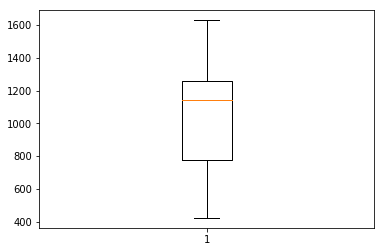

In [20]:
plt.boxplot(total_dist_gps)
plt.show()

In [236]:
#getting difference (seconds) in timestamps for each sample so that can compute "feasible" time to walk 
for i in range(len(df)):
    df[i]['change']= ((df[i]['timestamp'] - df[i]['start_time']))

In [284]:
#making cutoffs for what is physically possible in that amount of time.

dist_df = []

for i in range(len(df)):
    dist = []
    new_thres = []
    healthCode = (df[i]['healthCode'])
    timezone = df[i]['timezone']
    createdOn = df[i]['createdOn']

    for index,row in df[i].iterrows():
        seconds = (row.change).seconds
    #     print seconds
        if seconds == 'nan':
            continue
        elif (row.change).seconds <2:
            if row.displacement <4.:
                dist.append(row.displacement)
        else:
            new_thres.append(seconds*4)
            if row.displacement <new_thres:
                dist.append(row.displacement)
                
    #create df with new distance, reported displacement, healthcode, created on, and timezone
    df_new = {'new_distance': sum(dist),
             'gps_reported': sum(df[i]['displacement']),
             'healthCode': healthCode[i],
             'createdOn': timezone[i],
             'timezone': createdOn[i]}
    dist_df.append(df_new)



In [285]:
dist_df

[{'createdOn': Timestamp('2017-09-20 16:22:56'),
  'gps_reported': 422.4031077872462,
  'healthCode': u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
  'new_distance': 194.08398956498232,
  'timezone': u'-0700'},
 {'createdOn': Timestamp('2017-09-20 16:40:22'),
  'gps_reported': 769.76697962556034,
  'healthCode': u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
  'new_distance': 318.6913625592235,
  'timezone': u'-0700'},
 {'createdOn': Timestamp('2017-09-20 16:40:23'),
  'gps_reported': 1526.2633951912946,
  'healthCode': u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
  'new_distance': 1081.0792932402612,
  'timezone': u'-0700'},
 {'createdOn': Timestamp('2017-09-20 17:06:07'),
  'gps_reported': 1327.7708031530133,
  'healthCode': u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
  'new_distance': 833.8895734846319,
  'timezone': u'-0700'},
 {'createdOn': Timestamp('2017-09-20 17:06:58'),
  'gps_reported': 648.39131455785468,
  'healthCode': u'763f2c03-4d6c-454e-a3ed-51726b9a30e9',
  'new_distance': 244.874128676

In [286]:
#turn this into a df so that I can merge with the createdOn date for the true distances measured by validation data
dist_gps = pd.DataFrame.from_dict(dist_df, orient='columns')


In [322]:
dist_gps

,createdOn,gps_reported,healthCode,new_distance,timezone,PST
0,2017-09-20 16:22:56,422.403108,763f2c03-4d6c-454e-a3ed-51726b9a30e9,194.083990,-0700,2017-09-20 09:22:56
1,2017-09-20 16:40:22,769.766980,763f2c03-4d6c-454e-a3ed-51726b9a30e9,318.691363,-0700,2017-09-20 09:40:22
2,2017-09-20 16:40:23,1526.263395,763f2c03-4d6c-454e-a3ed-51726b9a30e9,1081.079293,-0700,2017-09-20 09:40:23
3,2017-09-20 17:06:07,1327.770803,763f2c03-4d6c-454e-a3ed-51726b9a30e9,833.889573,-0700,2017-09-20 10:06:07
4,2017-09-20 17:06:58,648.391315,763f2c03-4d6c-454e-a3ed-51726b9a30e9,244.874129,-0700,2017-09-20 10:06:58
5,2017-09-20 17:19:40,1324.632540,763f2c03-4d6c-454e-a3ed-51726b9a30e9,851.820202,-0700,2017-09-20 10:19:40
6,2017-09-20 17:20:10,1141.546083,763f2c03-4d6c-454e-a3ed-51726b9a30e9,763.298561,-0700,2017-09-20 10:20:10
7,2017-09-20 17:43:43,429.715948,763f2c03-4d6c-454e-a3ed-51726b9a30e9,168.131014,-0700,2017-09-20 10:43:43
8,2017-09-20 17:57:15,1402.388070,763f2c03-4d6c-454e-a3ed-51726b9a30e9,941.779923,-0700,2017-09-20 10:57:15
9,2017-09-20 17:57:34,1264.665041,763f2c03-4d6c-454e-a3ed-51726b9a30e9,816.395692,-0700,2017-09-20 10:57:34


In [337]:
#adding a column where convert created On timestamp to PST so we can merge with ground truth measurements.
dist_gps['PST'] = (dist_gps['createdOn'] +  timedelta(hours=-7))

#converting timestamp to match that in truth distances
PST = []

for index,row in dist_gps.iterrows():
    PST.append(datetime.strftime(row.PST,"%-m/%d/%y %H:%M"))


In [339]:
dist_gps['timetouse'] = PST

In [303]:
#pull in ground truth data
truth_dist = pd.read_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/Final_csvs/6mwtTrueDistances.csv')
truth_dist

,Unnamed: 0,Height,TrueDistance (m),Android 5 Samsung,AndroidMotorola,iphoneSE.yards,iphone7.yards,iPhone7.meters,iPhoneSE.meters,iPodTouch.meters,CreatedOn_Not6,Device (SE),iPhone6.meters,CreatedOn_iphone6,Unnamed: 14,Height_m,Furthest to walk
0,Anna,65,670,676.0,642.0,733.0,796,727.8624,670.2552,422.403108,9/20/17 9:22,"iPhone8,4",NaN,NaN,NaN,1.6510,3.3020
1,John,71,747,670.0,700.0,761.0,781,714.1464,695.8584,769.766980,9/20/17 9:40,"iPhone8,4",1526.263395,9/20/17 9:40,NaN,1.8034,3.6068
2,Alex Dainis,67,757,684.0,698.0,617.0,738,674.8272,564.1848,187.874386,9/20/17 9:51,"iPhone8,4",NaN,NaN,NaN,1.7018,3.4036
3,Chunli,65,689,NaN,684.0,709.0,708,647.3952,648.3096,648.391315,9/20/17 10:06,"iPhone8,4",1327.770803,9/20/17 10:06,NaN,1.6510,3.3020
4,Marie,65,698,NaN,640.0,672.0,692,632.7648,614.4768,1141.546083,9/20/17 10:20,"iPhone8,4",1324.632540,9/20/17 10:19,NaN,1.6510,3.3020
5,Anika,73,528,496.0,507.0,541.0,606,554.1264,494.6904,429.715948,9/20/17 10:43,"iPhone8,4",NaN,NaN,NaN,1.8542,3.7084
6,Cameron,70,585,558.0,544.0,660.0,571,522.1224,603.5040,1402.388070,9/20/17 10:57,"iPhone8,4",1264.665041,9/20/17 10:57,NaN,1.7780,3.5560
7,Audrey,69,686,558.0,NaN,682.0,665,608.0760,623.6208,1191.413092,9/20/17 11:09,"iPhone8,4",NaN,NaN,NaN,1.7526,3.5052
8,Hannah,63,657,NaN,603.0,610.0,665,608.0760,557.7840,1165.123968,9/20/17 11:22,"iPhone8,4",1103.627916,9/20/17 11:22,NaN,1.6002,3.2004
9,Yong,64,658,484.0,606.0,661.0,700,640.0800,604.4184,537.807199,9/20/17 11:33,"iPhone8,4",1256.746475,9/20/17 11:33,NaN,1.6256,3.2512


In [308]:
len(dist_gps)

25

In [309]:
len(truth_dist)

17

In [341]:
#merge new calculated distances with ground truth df

gps_calculations = dist_gps.merge(truth_dist, left_on='timetouse', right_on='CreatedOn_Not6',how='inner')
len(gps_calculations)

19

In [354]:
dist_gps.to_csv('/Users/nicolemoyen/Dropbox/Stanford/AshleyLab/6mwt/distance.csv')

In [346]:
gps_calculations.keys()

Index([u'createdOn', u'gps_reported', u'healthCode', u'new_distance',
       u'timezone', u'PST', u'timetouse', u'Unnamed: 0', u'Height',
       u'TrueDistance (m)', u'Android 5 Samsung', u'AndroidMotorola',
       u'iphoneSE.yards', u'iphone7.yards', u'iPhone7.meters',
       u'iPhoneSE.meters', u'iPodTouch.meters', u'CreatedOn_Not6',
       u'Device (SE)', u'iPhone6.meters', u'CreatedOn_iphone6', u'Unnamed: 14',
       u'Height_m', u'Furthest to walk'],
      dtype='object')

In [412]:
#calculate %difference in new calcuated distance vs. true distance

per_change = ((gps_calculations['new_distance'] - gps_calculations['TrueDistance (m)']))
# per_change

original_change = ((gps_calculations['gps_reported'] - gps_calculations['TrueDistance (m)']))

# for i, k, m in zip(per_change, original_change, gps_calculations['Unnamed: 0']):
#     print i, k, m

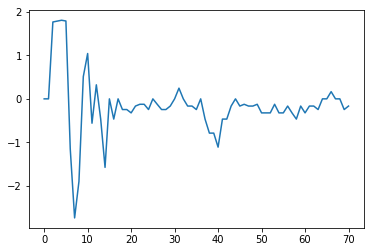

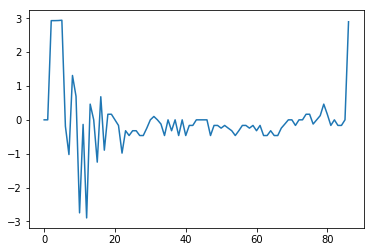

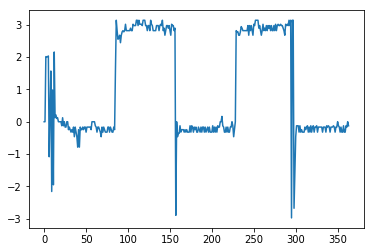

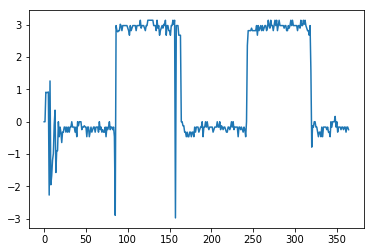

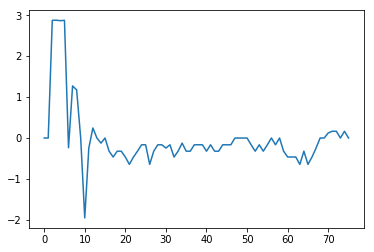

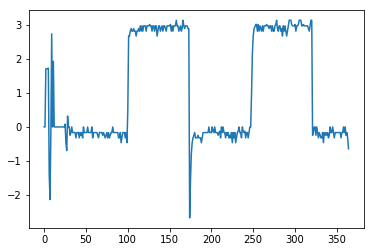

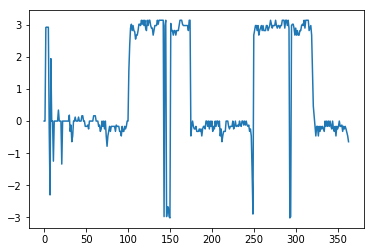

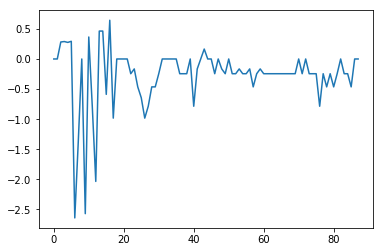

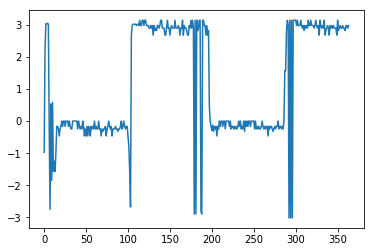

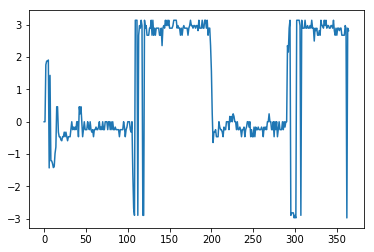

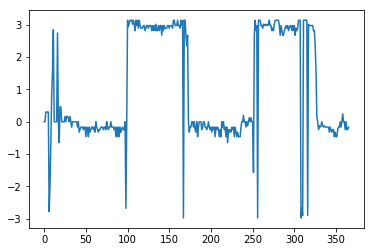

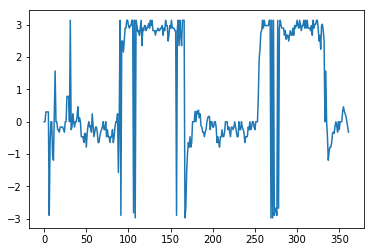

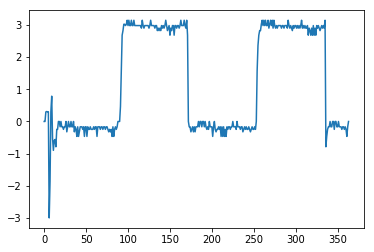

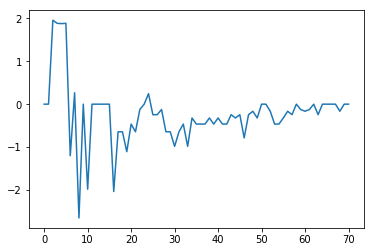

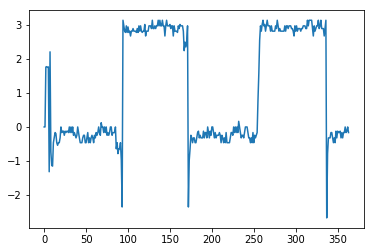

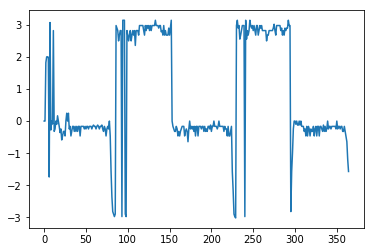

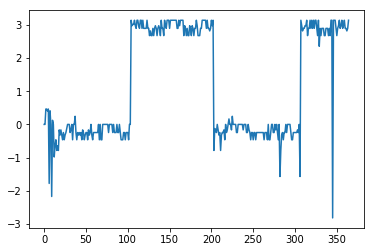

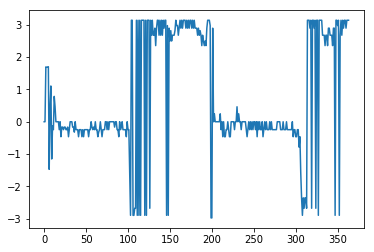

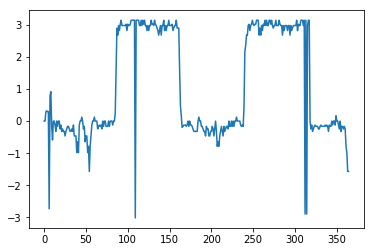

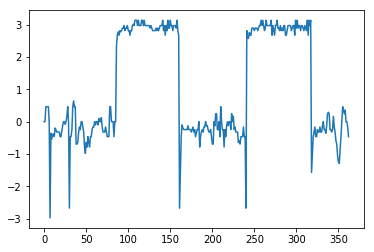

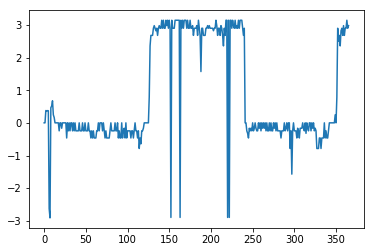

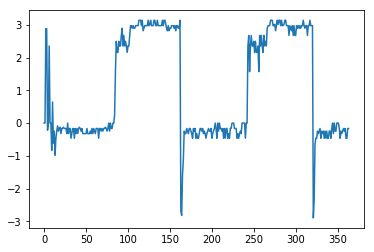

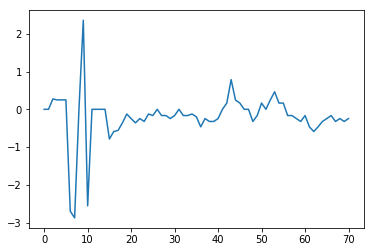

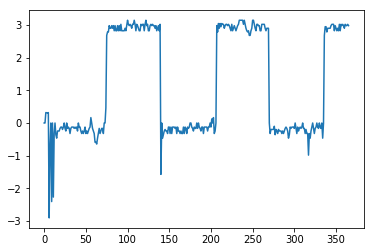

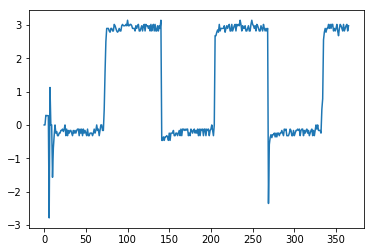

In [252]:
for i in range(len(df)):
    plt.plot(df[i]['direction'])
    plt.show()

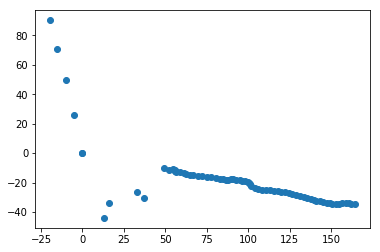

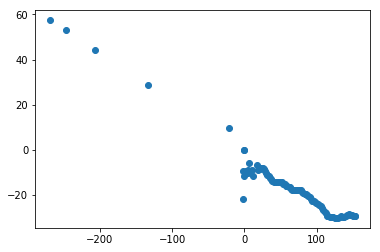

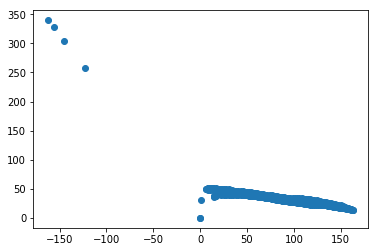

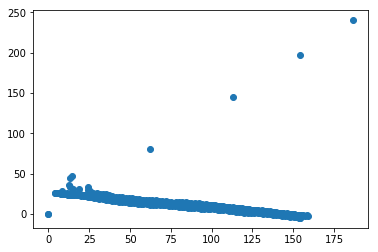

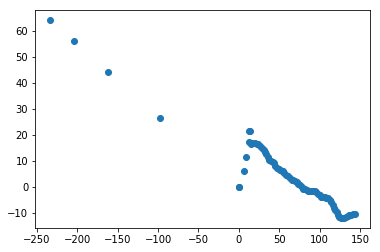

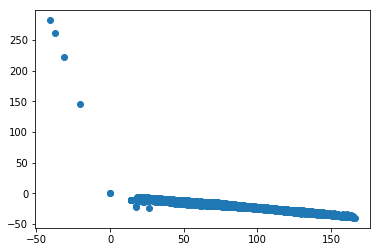

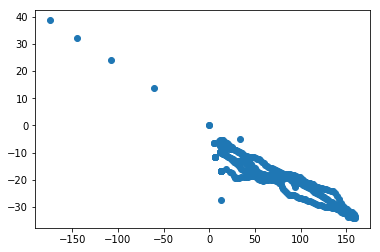

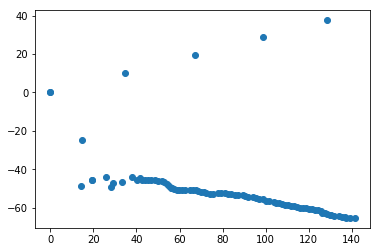

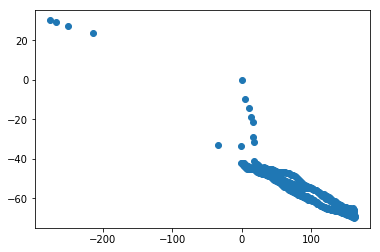

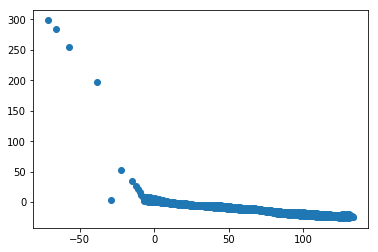

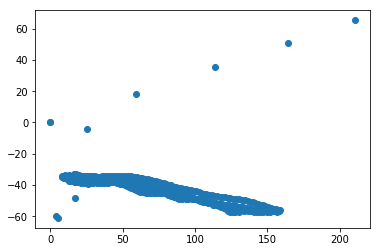

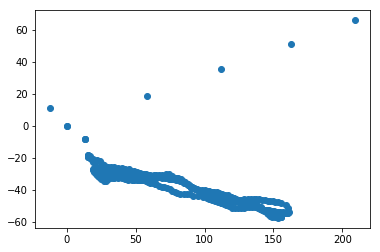

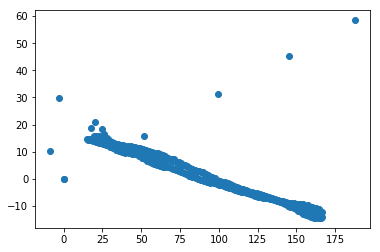

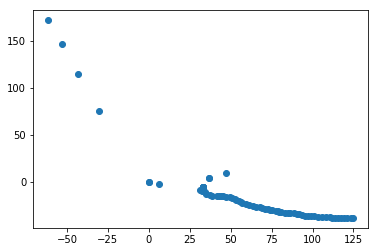

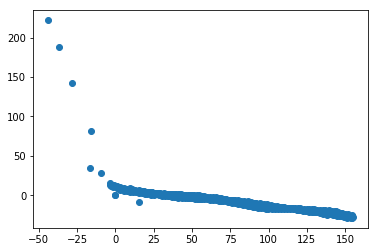

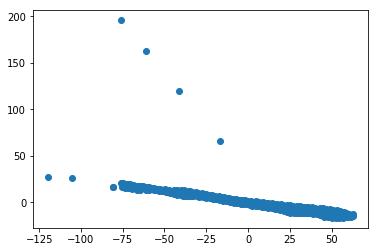

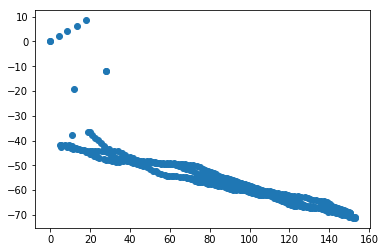

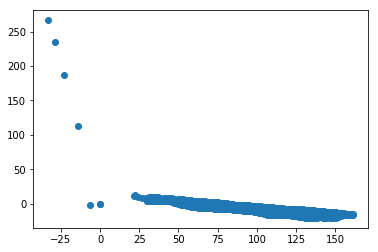

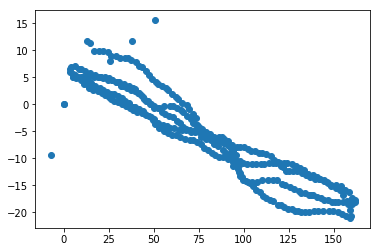

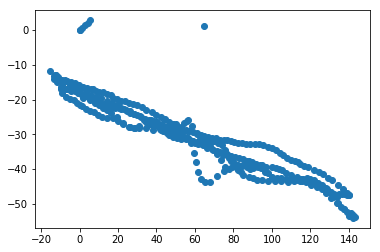

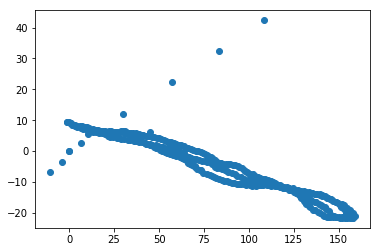

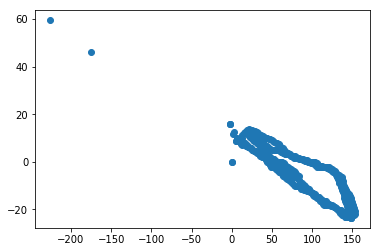

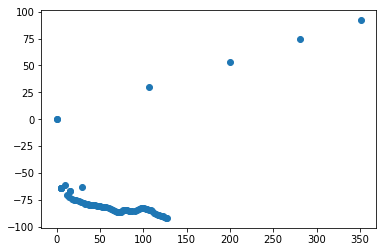

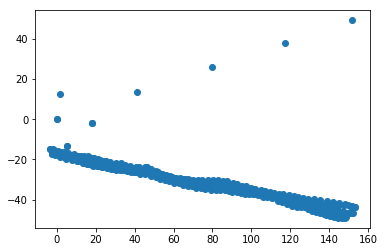

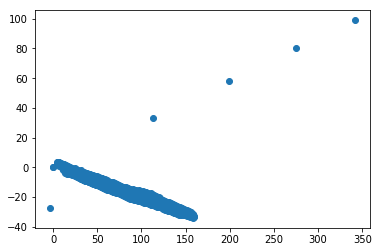

In [253]:
for i in range(len(df)):
    x = df[i]['x']
    y = df[i]['y']
    plt.plot(x,y,'o')
    plt.show()

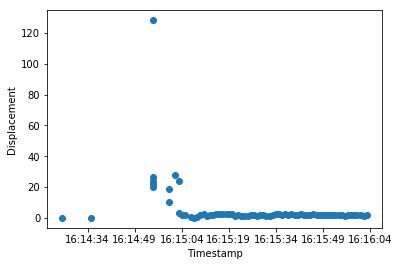

422.403107787
version 2.0.2, build 103


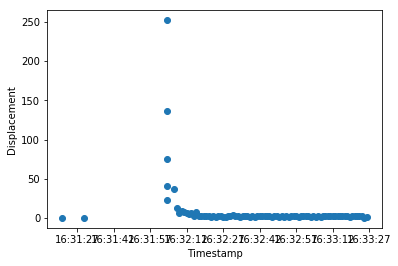

769.766979626
version 2.0.2, build 103


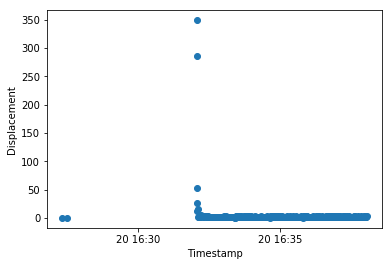

1526.26339519
version 2.0.2, build 103


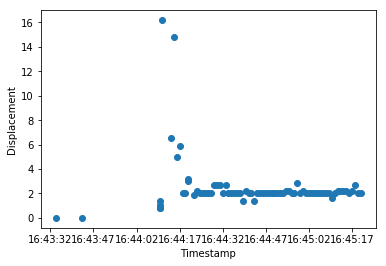

187.874386132
version 2.0.2, build 103


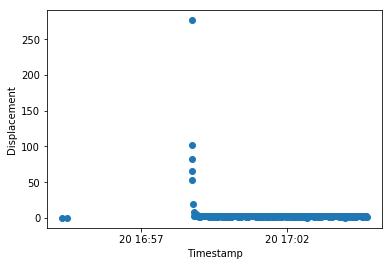

1327.77080315
version 2.0.2, build 103


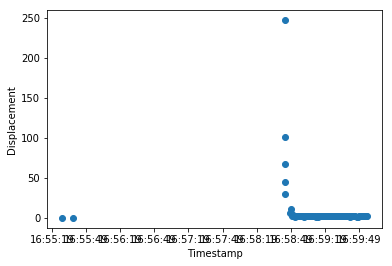

648.391314558
version 2.0.2, build 103


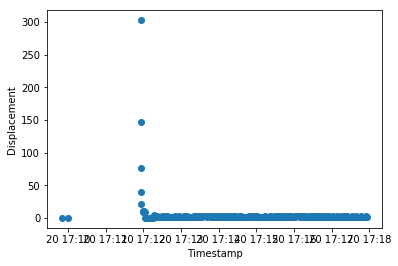

1324.63254042
version 2.0.2, build 103


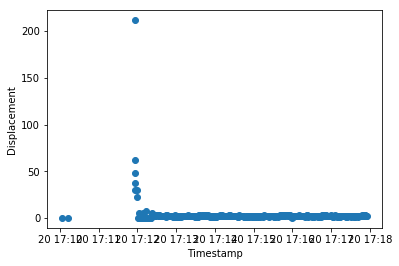

1141.54608275
version 2.0.2, build 103


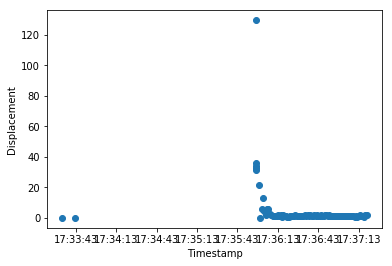

429.715948066
version 2.0.2, build 103


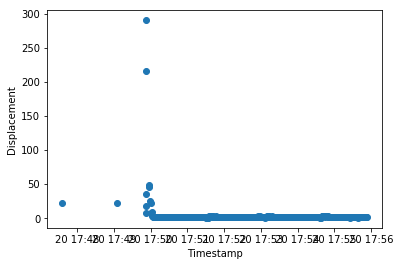

1402.3880703
version 2.0.2, build 103


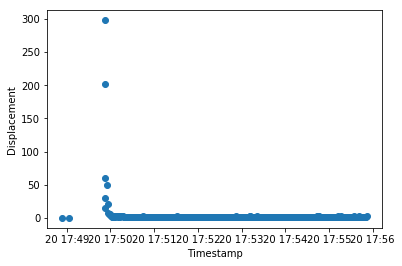

1264.66504084
version 2.0.2, build 103


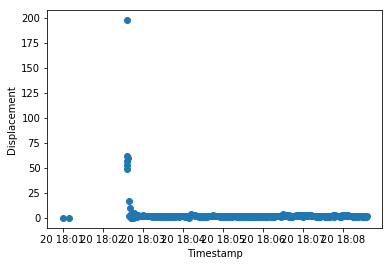

1191.41309222
version 2.0.2, build 103


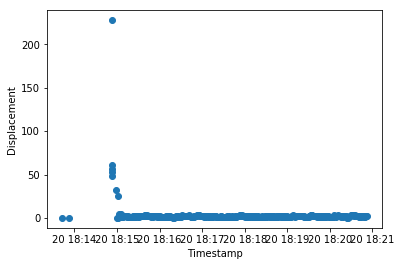

1165.12396833
version 2.0.2, build 103


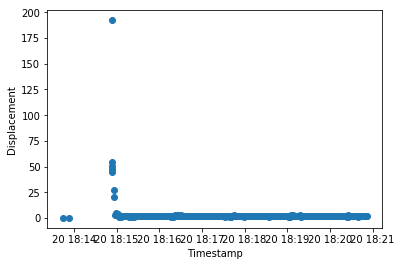

1103.62791568
version 2.0.2, build 103


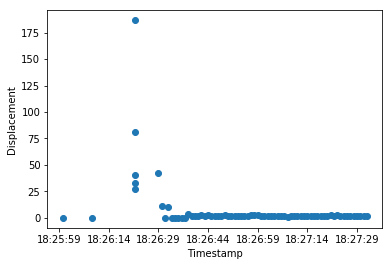

537.807198604
version 2.0.2, build 103


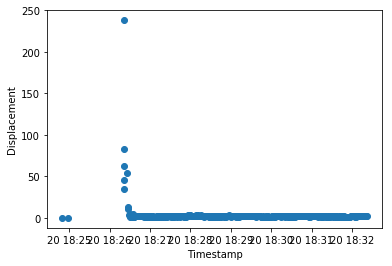

1256.74647526
version 2.0.2, build 103


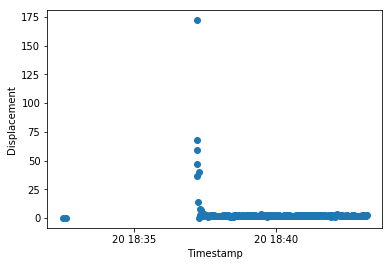

1159.21006649
version 2.0.2, build 103


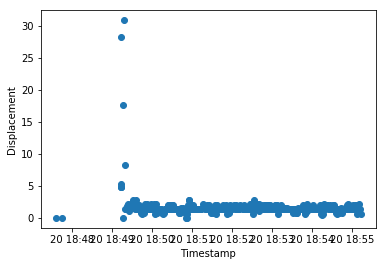

635.68609992
version 2.0.2, build 103


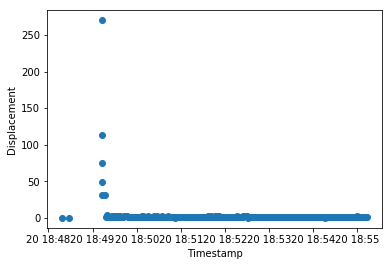

1054.81637242
version 2.0.2, build 103


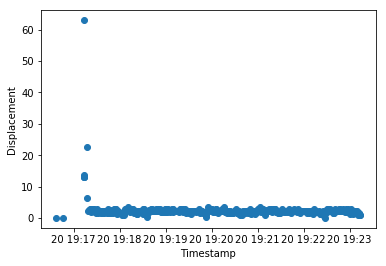

876.914521627
version 2.0.2, build 103


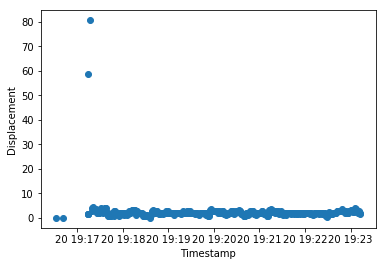

907.905406483
version 2.0.2, build 103


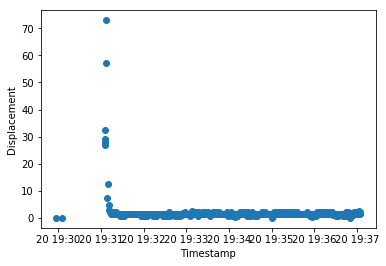

776.710241561
version 2.0.2, build 103


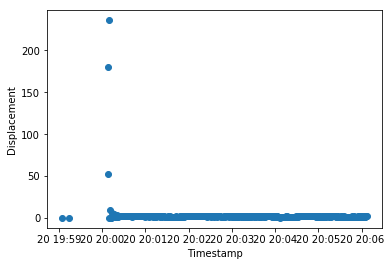

1144.21945529
version 2.0.2, build 103


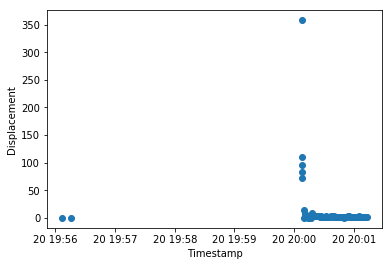

878.474759982
version 2.0.2, build 103


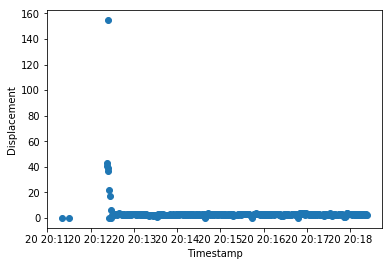

1223.36499383
version 2.0.2, build 103


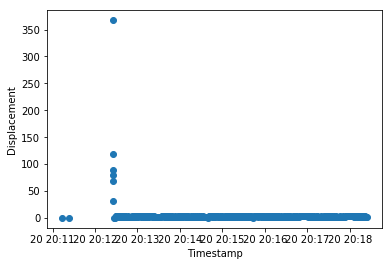

1628.80282924
version 2.0.2, build 103


In [236]:
for i in range(len(gps_valdf)):
    y = gps_valdf[i]['displacement']
    x = gps_valdf[i]['timestamp']
    plt.xlabel('Timestamp')
    plt.ylabel('Displacement')
#     plt.annotate(str(gps_data['appVersion'][i]), [max(x),max(y)])
    plt.plot(x,y,'o')
    plt.show()
    plt.close()
    print sum(gps_valdf[i]['displacement'])
    print (gps_valdf[i]['version'][i])

In [ ]:
'''
-can use x,y reconstruction to detect outliers- need to remove these outliers from displacement data of final result;
-can also look at how many "loops" they made and calculate distance based on that.,, each lap is 150 m
-outlier for x,y plot indicate poor accuracy for gps and these should be removed.
**first need to pull only validation sets (17/26) to analyze based on CreatedOn time.**
-steve says would be good to superimpose route with x,y reconstruction.'''

In [262]:
#converting all created on timestamps to UTC so that we can match them to their PT from the validation study
from datetime import datetime, timedelta

time = []
change = []
sign = []
new_time = []
PST_time = []
alreadyPST = timedelta(hours=-7)
PST = timedelta(hours=7)
changedT = []
timetouse = []

for i in range(len(df)):
    time.append(df[i]['createdOn'][i]) #this is already UTC time- reason unknown
    change.append(timedelta(hours=(int(df[i]['timezone'][i][1:-2]))))
    sign.append(np.sign(float(df['timezone'][i])))
    
    if sign[i] == -1:
        new_time.append(time[i]-change[i])
    else:
        new_time.append(time[i]+change[i])
        
#     if str(val_df['createdOnTimeZone'][i]) == '-0700':
#         PST_time.append(new_time[i])
#     else:
#     PST_time.append(new_time[i] - PST)
    changedT.append((str(new_time[i]).replace('-','/'))[:-3])
    timetouse.append(datetime.strptime(changedT[i],"%Y/%m/%d %H:%M").strftime("%-m/%d/%y %H:%M"))
    

TypeError: 'Timestamp' object has no attribute '__getitem__'

In [24]:
#adding PST time as column so that can match this to the gait speed and anthropometric data as well as google sheet of actual measured distances. 
val_df['timetouse'] = timetouse
val_df['UTC_time'] = new_time
# val_df['PST_time'] = PST_time

# val_df[26:40]

# Pulling in 20 random gps files from 6MWT (from 'the wild') for comparison

In [393]:
#pulling in random files to look at graphs in comparison to validation data - in the wild data where don't go back and forth in same lines
extra_files = []
for x in range(1,20):
    extra_files.append(syn.downloadTableFile(table_results, column='UnknownFile_1.json.items', rowId=x, versionNumber=1, ifcollision=u'keep.both'))

Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.
Requests are too frequent for API call: /entity/#/column. Allowed 6 requests every 60 seconds.


In [394]:
extra_gps = []

for i in range(len(extra_files)):
    extra_gps.append(pd.read_json(extra_files[i]))

In [395]:
extra_gps[1].head()

,altitude,direction,directionUnit,displacement,displacementUnit,horizontalAccuracy,timestamp,verticalAccuracy
0,2.938171,0,meters,0,meters,10,2015-06-03 18:09:15,4
1,2.937683,0,meters,0,meters,10,2015-06-03 18:09:16,4
2,2.937653,0,meters,0,meters,10,2015-06-03 18:09:17,4
3,2.934753,0,meters,0,meters,10,2015-06-03 18:09:18,4
4,2.936249,0,meters,0,meters,10,2015-06-03 18:09:19,4


In [396]:
append=[]

for i in range(len(extra_gps)):
    delta.append(extra_gps[i].timestamp[-1:] - extra_gps[i].timestamp[0])

In [397]:
delta

[353   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 360   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 198   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 355   00:05:59
 Name: timestamp, dtype: timedelta64[ns], 358   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 352   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 363   00:05:59
 Name: timestamp, dtype: timedelta64[ns], 359   00:05:59
 Name: timestamp, dtype: timedelta64[ns], 355   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 360   00:05:59
 Name: timestamp, dtype: timedelta64[ns], 357   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 359   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 359   00:05:59
 Name: timestamp, dtype: timedelta64[ns], 12   00:05:30
 Name: timestamp, dtype: timedelta64[ns], 360   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 359   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 361   00:06:00
 Name: timestamp, dtype: timedelta64[ns], 360   00:06:00
 Name: timestamp

In [409]:
#from steve's notebook
df_extra = extra_gps

for i in range(len(df_extra)):
    df_extra[i]["dx"] = df_extra[i].displacement * np.cos(df_extra[i].direction)
    df_extra[i]["dy"] = df_extra[i].displacement * np.sin(df_extra[i].direction)
    # sum displacements to coordinates
    df_extra[i]["x"] = df_extra[i].dx.cumsum()
    df_extra[i]["y"] = df_extra[i].dy.cumsum()

In [411]:
df_extra[1].head()

,altitude,direction,directionUnit,displacement,displacementUnit,horizontalAccuracy,timestamp,verticalAccuracy,dx,dy,x,y
0,2.938171,0,meters,0,meters,10,2015-06-03 18:09:15,4,0.0,0.0,0.0,0.0
1,2.937683,0,meters,0,meters,10,2015-06-03 18:09:16,4,0.0,0.0,0.0,0.0
2,2.937653,0,meters,0,meters,10,2015-06-03 18:09:17,4,0.0,0.0,0.0,0.0
3,2.934753,0,meters,0,meters,10,2015-06-03 18:09:18,4,0.0,0.0,0.0,0.0
4,2.936249,0,meters,0,meters,10,2015-06-03 18:09:19,4,0.0,0.0,0.0,0.0


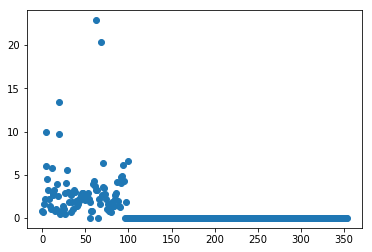

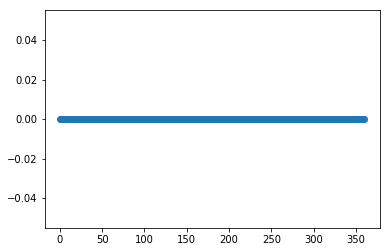

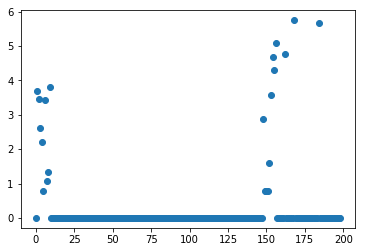

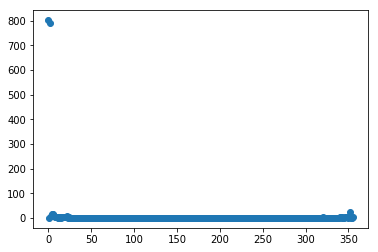

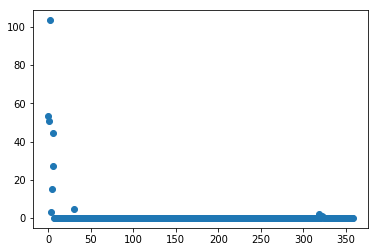

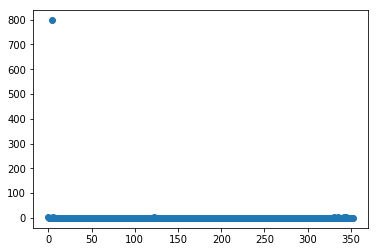

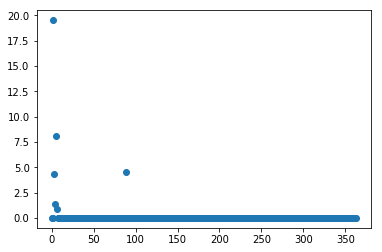

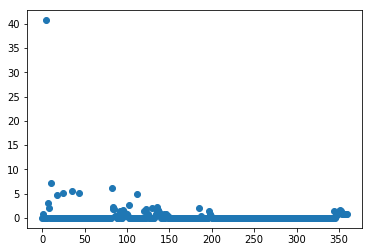

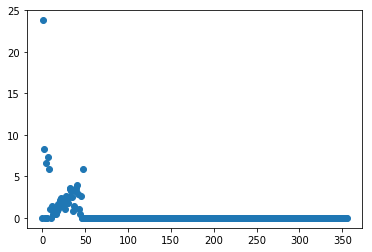

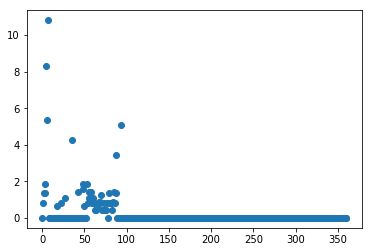

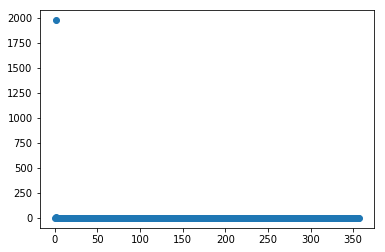

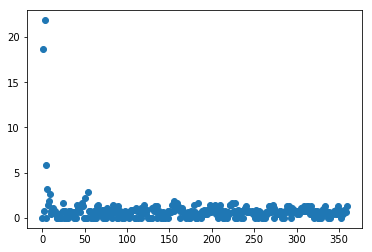

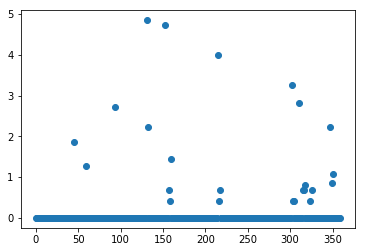

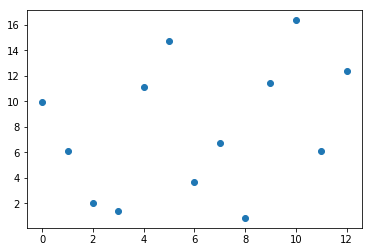

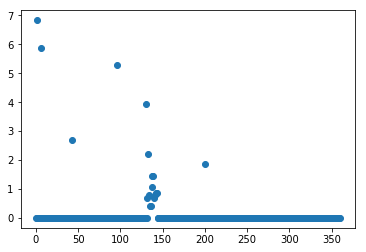

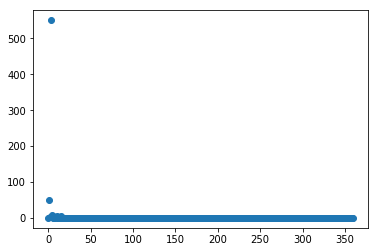

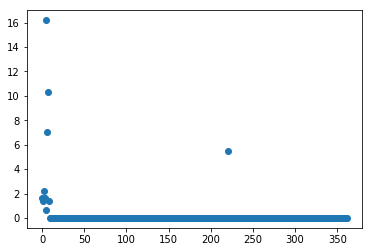

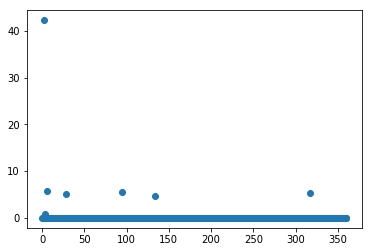

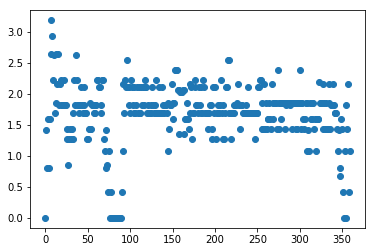

In [410]:
for i in range(len(df_extra)):
    x = df_extra[i]['displacement']
#     y = df_extra[i]['y']
    plt.plot(x,'o')
#     print sum(df_extra[i]['displacement'])
    plt.show()

303.454560477


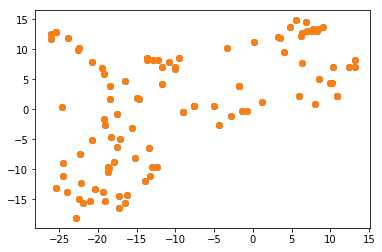

0


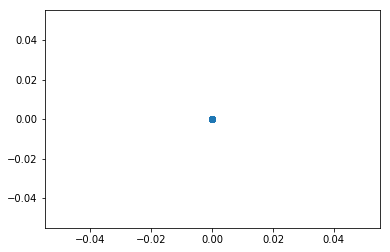

63.2009784865


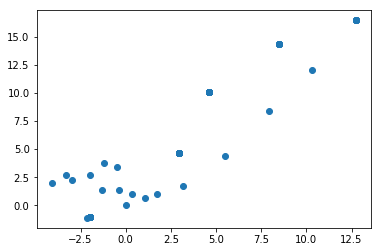

1779.60345164


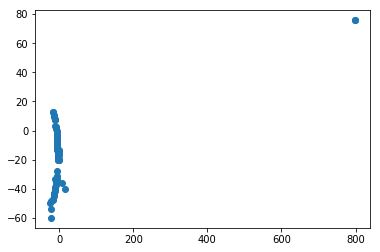

305.554530559


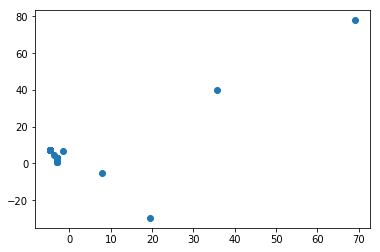

829.637130414


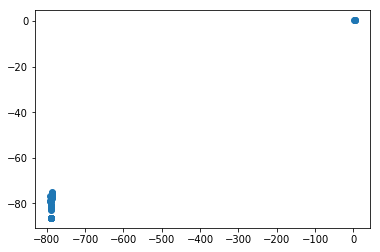

38.7624743009


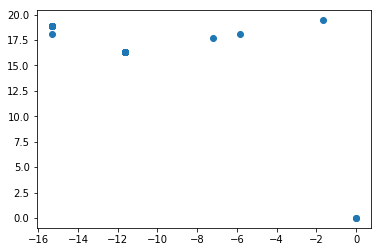

141.233630709


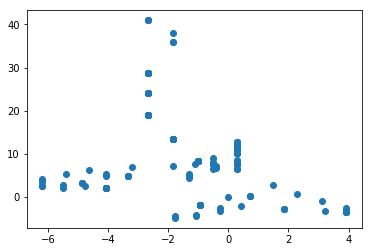

126.621547198


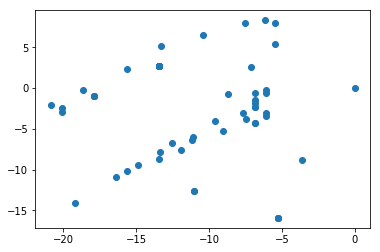

80.5319322069


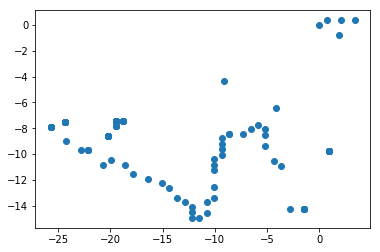

2437.62159152


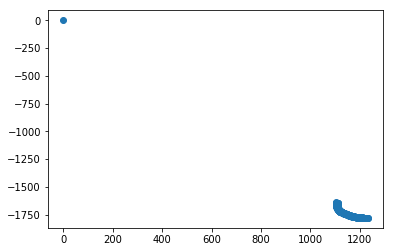

282.147350551


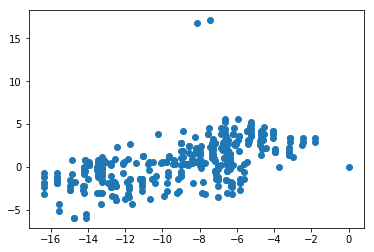

39.6333995101


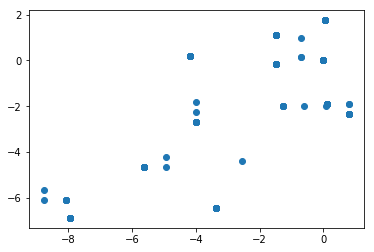

102.994941035


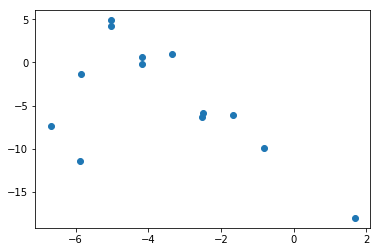

38.1016070232


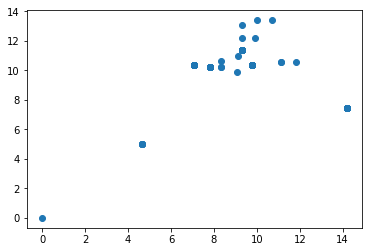

634.297611518


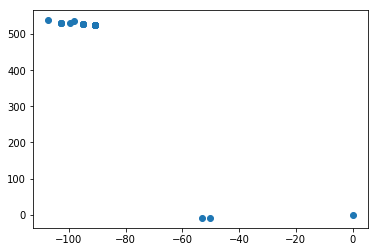

47.8879979831


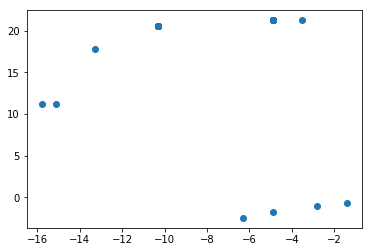

69.6826019262


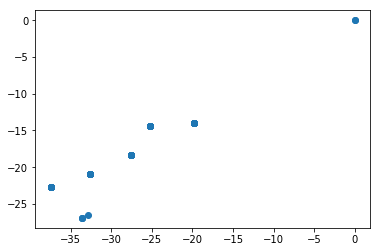

603.7855324


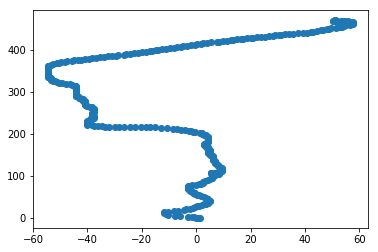

In [36]:
for i in range(len(df_extra)):
    x = df_extra[i]['x']
    y = df_extra[i]['y']
    plt.plot(x,y,'o')
    print sum(df_extra[i]['displacement'])
    plt.show()